# ISPY2_view_data
/Downloads/breast_mri/BreastDCEDL/BreastDCEDL/ISPY2_view_data.ipynb

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/naomifridman/BreastDCEDL/blob/main/ISPY2_view_data.ipynb)

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import sys
from pathlib import Path

In [184]:
# Add this at the beginning of your notebook

# Check if running in Google Colab

if 'google.colab' in str(get_ipython()):
    print("Running in Google Colab")
    # Clone the repository
    !git clone https://github.com/naomifridman/BreastDCEDL.git
    !pip install pydicom

    # Change to the repository directory
    os.chdir('/content/BreastDCEDL')


In [185]:

from PIL import Image
import requests
import argparse
import datetime
import json
import numpy as np
import os
import time
from pathlib import Path


In [186]:
import os
import numpy as np
import pandas as pd
from PIL import Image

In [187]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')

import os
from __future__ import print_function

import glob
from itertools import chain
import os
import random
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [188]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [189]:
from glob import glob
#from skimage import io
from sklearn.utils import shuffle

#from nipype.interfaces.ants import N4BiasFieldCorrection
import sys
import os
import ast

In [190]:
import warnings
warnings.filterwarnings('ignore')

In [191]:
import os
import numpy as np

def print_info(ims):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    for im in ims:
        '''print(im.shape)
        sim = 1
        #for s in im.shape: sim*=s
        print(sim)'''
        print(im.shape, im.min(), im.max(), im.mean(), im.std(), \
              'n!=0:',im[im!=0].shape[0],im[im!=0].mean(),im.dtype)


import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# cb - cotrast_brightness
def show_n_images(imgs, cmap='gray', titles = None, enlarge = 4, mtitle=None,
                  cut = 0, axis_off = False, fontsize=15, cb = 0):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    plt.set_cmap(cmap);

    n = len(imgs);
    gs1 = gridspec.GridSpec(1, n);

    fig1 = plt.figure(figsize=(4*len(imgs),8));
    for i in range(n):

        ax1 = fig1.add_subplot(gs1[i]);
        if (cb):
            if len(np.unique(imgs[i])<=5):
                 img = imgs[i]
            else:

                img = cont_br(imgs[i])
        else:
            img = imgs[i]
        if cut:
            ax1.imshow(img[50:290, 75:450] , interpolation='none', origin='lower');
        else:

            ax1.imshow(img, interpolation='none');
        if (titles is not None):
            ax1.set_title(titles[i], fontsize=fontsize);  #, fontweight="bold");
        if (axis_off):
            plt.axis('off')
    if mtitle:
        plt.title(mtitle)
    plt.tight_layout()
    plt.show();

def minmax(im):
    if im.max()==0:
        return im

    return (im-im.min())/(im.max()-im.min())

In [192]:
from pathlib import Path
import pandas as pd
import os
import platform

def detect_environment():
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    # Check if running in Google Colab
    is_colab = False
    try:
        from google.colab import drive
        is_colab = True
    except:
        # Alternative check if import fails
        try:
            if 'google.colab' in str(get_ipython()):
                is_colab = True
        except:
            pass

    # Get system information
    system = platform.system()

    # Determine default separator
    default_separator = '\\' if system == 'Windows' else '/'

    return {
        'is_colab': is_colab,
        'system': system,
        'default_separator': default_separator
    }

def get_target_format():
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    # Detect environment
    env = detect_environment()

    # If target_format not specified, determine based on environment
    target_format=''

    if env['is_colab']:
        target_format = 'unix'
    else:
        target_format = 'windows' if env['system'] == 'Windows' else 'unix'

    # Validate target_format
    if target_format not in ['unix', 'windows']:
        raise ValueError("target_format must be 'unix' or 'windows'")
    return target_format

# Function to convert path to desired format
def format_path(p):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    target_format = get_target_format()

    if target_format == 'unix':
        return str(p).replace('\\', '/')
    else:  # windows
        return str(p).replace('/', '\\')

def join_path(base_path, fname):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    b = format_path(base_path)
    f = format_path(fname)
    print(b,f)
    return os.path.join(b, f)



In [193]:
dce_path= os.path.join("ISPY2","data_sample","dce")
mask_path=os.path.join("ISPY2","data_sample","masks")

# Dicom utilies

In [345]:
import pydicom

# return list of numpy array of voxels
def read_dcm_series(fname, bpath=base_path):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fpathf = join_path(bpath,fname)

    ll = os.listdir(fpathf)
    pe=[]
    for p in ll:
            d = pydicom.dcmread(join_path(fpathf,p))
            pe.append(d.pixel_array)
    return pe

# returns list of dcm objectys
def read_dcm_series_dicom(fname, bpath=base_path):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fpathf = join_path(bpath,fname)

    ll = os.listdir(fpathf)
    pe=[]
    for p in ll:
            d = pydicom.dcmread(join_path(fpathf,p))
            pe.append(d)
    return pe

def get_dicom_val(d, tag=(0x0020, 0x0105)):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    val = d.get(tag).value if tag in d else None
    return val

def get_int_dicom_val(d, tag=(0x0020, 0x0105)):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    val = int(float(d.get(tag).value)) if tag in d else None
    return val

# Niftii Utils

In [194]:
import nibabel as nib

def read_niftii(fname):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    # Load the NIfTI file
    nii_img = nib.load(fname)

    # Get the data (as a NumPy array)
    mnii_data = nii_img.get_fdata()

    return mnii_data

In [195]:
def get_nifti_acquisitions(pid, fpath=dce_path,
                           nifti_acq_ext='_spy2_vis1_dce_aqc_'):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fname = pid + nifti_acq_ext + '0.nii.gz'
    print(join_path(fpath,fname))
    if not os.path.isfile(join_path(fpath,fname)):
        print('no nifti files')
        return None

    x=read_niftii( join_path(fpath,fname))
    img=[x]
    for k in range(1,1000,1):

        fname=pid+nifti_acq_ext+str(k)+'.nii.gz'

        if not os.path.isfile(join_path(fpath,fname)):
            #print('last im', k)
            break

        x=read_niftii( join_path(fpath,fname))

        img.append(x)
    return img

In [196]:
def get_ser_acquisitions(pid, fpath=dce_path, ser=[0,2,5],
                           nifti_acq_ext='_spy2_vis1_dce_aqc_'):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fname = pid + nifti_acq_ext +str(int(ser[0])) + '.nii.gz'
    print(fname )
    print(fpath)
    print(os.path.join(fpath,fname))
    if not os.path.isfile(join_path(fpath,fname)):
        print('no nifti files')
        return None
    print(join_path(fpath,fname))
    x=read_niftii( join_path(fpath,fname))
    img=[x]
    fname = pid + nifti_acq_ext +str(int(ser[1])) + '.nii.gz'
    x=read_niftii( join_path(fpath,fname))
    img.append(x)
    fname = pid + nifti_acq_ext +str(int(ser[2])) + '.nii.gz'
    x=read_niftii( join_path(fpath,fname))
    img.append(x)

    return img

In [197]:
def get_nifti_mask(pid, fpath=mask_path,
                           mask_acq_ext='_spy2_vis1_mask'):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fname = pid + mask_acq_ext + '.nii.gz'
    if not os.path.isfile(os.path.join(fpath,fname)):
        print('no nifti files')
        return None

    img=read_niftii( join_path(fpath,fname))

    return img

In [198]:
import numpy as np
import nibabel as nib

# Load metadata

In [336]:
df = pd.read_csv(os.path.join('ISPY2','metadata_spy2_vis1_for_modeling.csv'))
df.head()

pid  n_xy  n_z  n_times     pre  post_early  post_late  \
0  ACRIN-6698-102212   256   80        8 0.00000     2.00000    6.00000   
1  ACRIN-6698-103939   256   64        7 0.00000     2.00000    5.00000   
2  ACRIN-6698-104268   256   80        8 0.00000     2.00000    6.00000   
3  ACRIN-6698-107700   256   80        8 0.00000     2.00000    6.00000   
4  ACRIN-6698-108969   256   80        8 0.00000     2.00000    6.00000   

  pix_type  slice_thick  slice_space  ...  r_black  mask_count  mask_max  pCR  \
0   uint16      2.00000      2.00000  ...  0.00000 42423.00000  38.00000    0   
1   uint16      2.50000      2.50000  ...  0.00000 18444.00000  30.00000    0   
2   uint16      2.00000      2.00000  ...  1.00000 36332.00000  47.00000    0   
3   uint16      2.00000      2.00000  ...  0.00000  3512.00000  39.00000    0   
4   uint16      2.00000      2.00000  ...  0.00000 79747.00000  32.00000    1   

   HR  MP  HRposHER2neg  HER2pos  TripleNeg    test  
0   0   0             0        0          1 1.00000  
1   1   0             1        0          0 0.00000  
2   0   1             0        0          1 0.00000  
3   1   0             0        1          0 0.00000  
4   0   0             0        1          0 0.00000  

[5 rows x 25 columns]

# Load example and visualize

In [200]:
subject_id = 'ISPY2-550421'

df[df.pid==subject_id].T

642
pid           ISPY2-550421
n_xy                   256
n_z                    160
n_times                  7
pre                0.00000
post_early         2.00000
post_late          6.00000
pix_type            uint16
slice_thick        1.00000
slice_space        1.00000
xy_spacing         0.68807
mask_start        58.00000
mask_end         123.00000
age               49.00000
r_white            0.00000
r_black            1.00000
mask_count    104785.00000
mask_max          80.00000
pCR                      0
HR                       0
MP                       1
HRposHER2neg             0
HER2pos                  0
TripleNeg                1
test               0.00000

## View SER aquisitions

In [201]:
ser = [0,2,6]

In [202]:
d = get_ser_acquisitions(subject_id, ser=ser)
d[0].shape

ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2\data_sample\dce
ISPY2\data_sample\dce\ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2\data_sample\dce\ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_2.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_6.nii.gz


(160, 256, 256)

In [203]:
m = get_nifti_mask(subject_id)
m.shape,m.max(),np.unique(m)

ISPY2\data_sample\masks ISPY2-550421_spy2_vis1_mask.nii.gz


((160, 256, 256), np.float64(1.0), array([0., 1.]))

<Figure size 640x480 with 0 Axes>

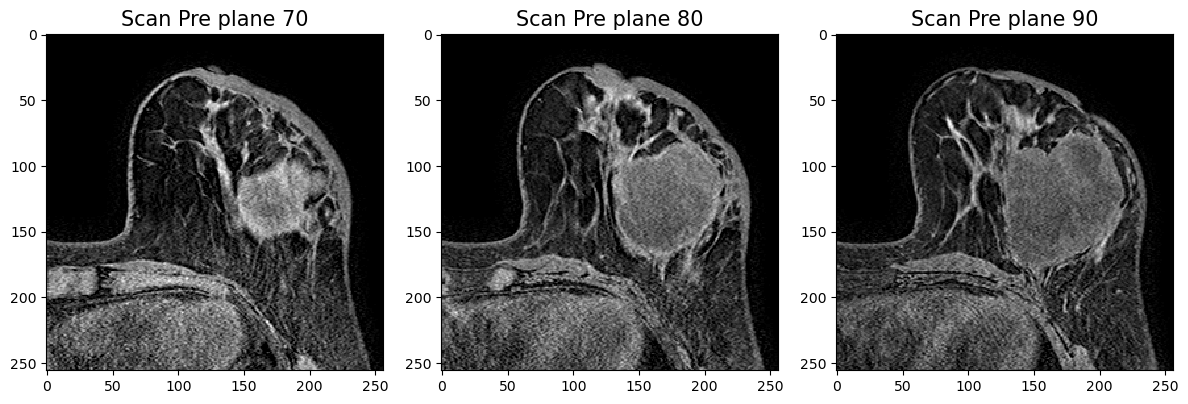

<Figure size 640x480 with 0 Axes>

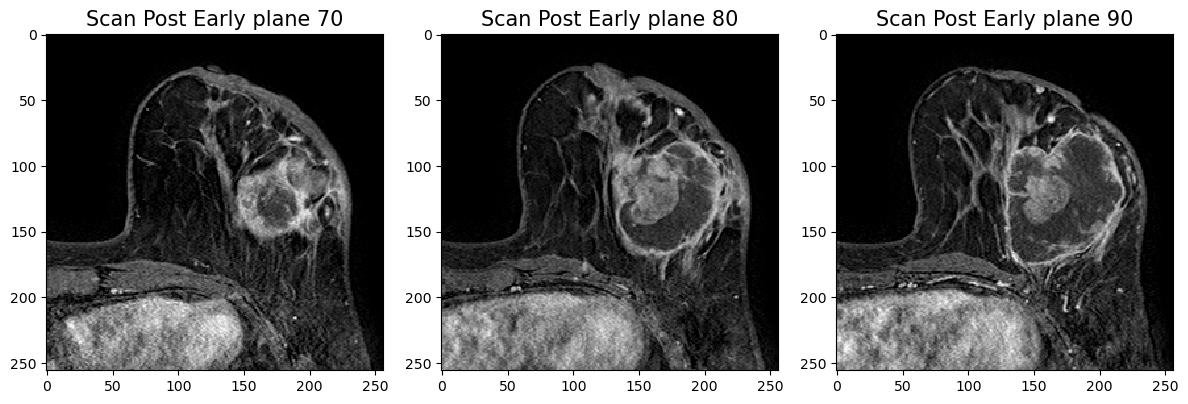

<Figure size 640x480 with 0 Axes>

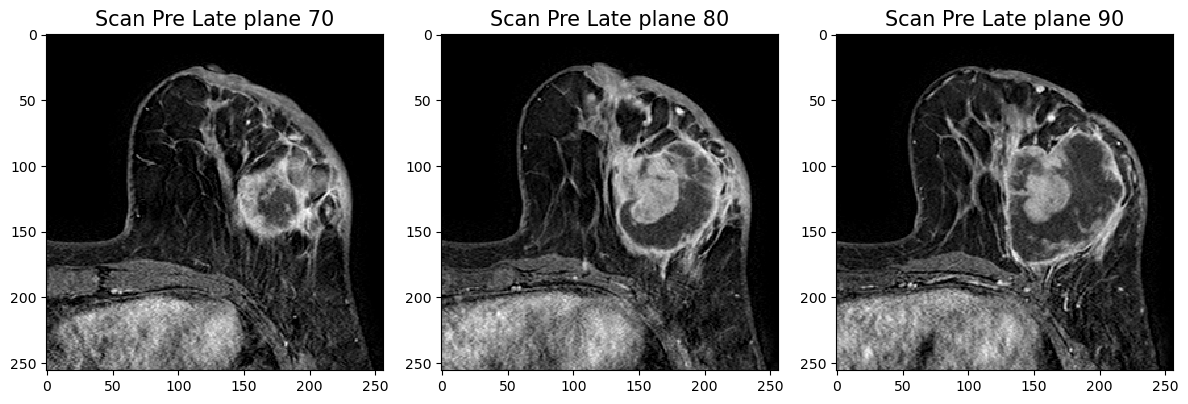

<Figure size 640x480 with 0 Axes>

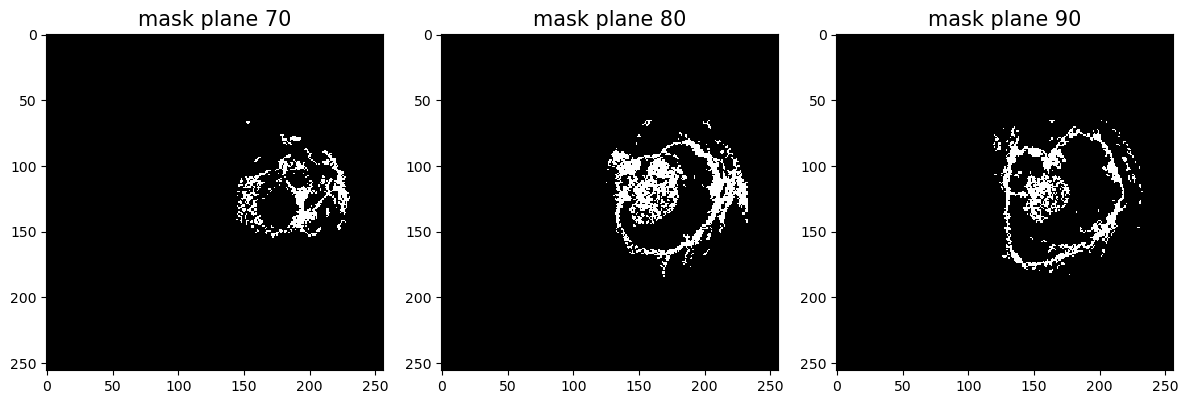

<Figure size 640x480 with 0 Axes>

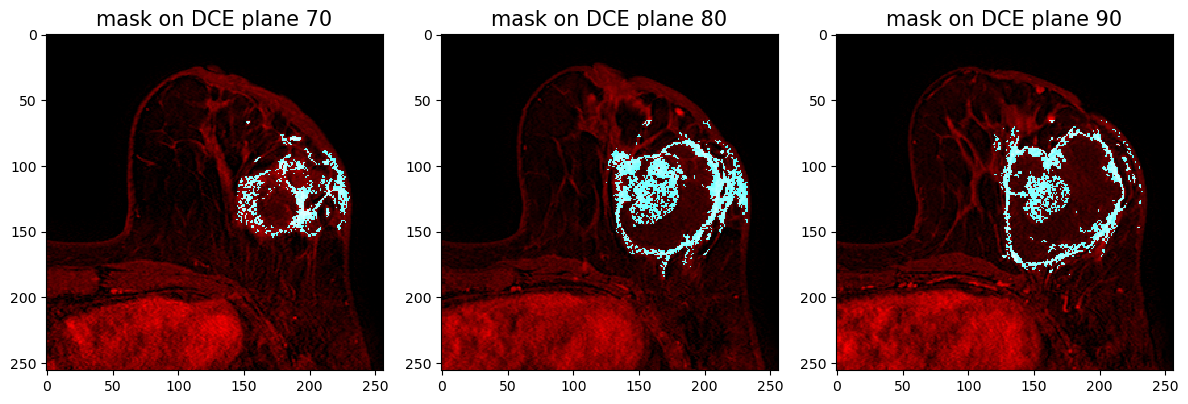

In [204]:
idx=[70,80,90]
show_n_images([d[0][i] for i in idx], titles=['Scan Pre plane '+str(i) for i in idx])
show_n_images([d[1][i] for i in idx], titles=['Scan Post Early plane '+str(i) for i in idx])
show_n_images([d[2][i] for i in idx], titles=['Scan Pre Late plane '+str(i) for i in idx])
show_n_images([m[i] for i in idx], titles=['mask plane '+str(i) for i in idx])
show_n_images([np.stack([minmax(d[1][i]),
                         m[i]/m.max(),m[i]/m.max()],axis=2) for i in idx],
              titles=['mask on DCE plane '+str(i) for i in idx])

## View all aquisitions

In [205]:
d = get_nifti_acquisitions(subject_id)
len(d), d[0].shape

ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2\data_sample\dce\ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_1.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_1.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_2.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_2.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_3.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_3.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_4.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_4.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_5.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_5.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_6.nii.gz
ISPY2\data_sample\dce ISPY2-550421_spy2_vis1_dce_aqc_6.nii.gz
ISPY2\da

(7, (160, 256, 256))

====  Scan:  0


<Figure size 640x480 with 0 Axes>

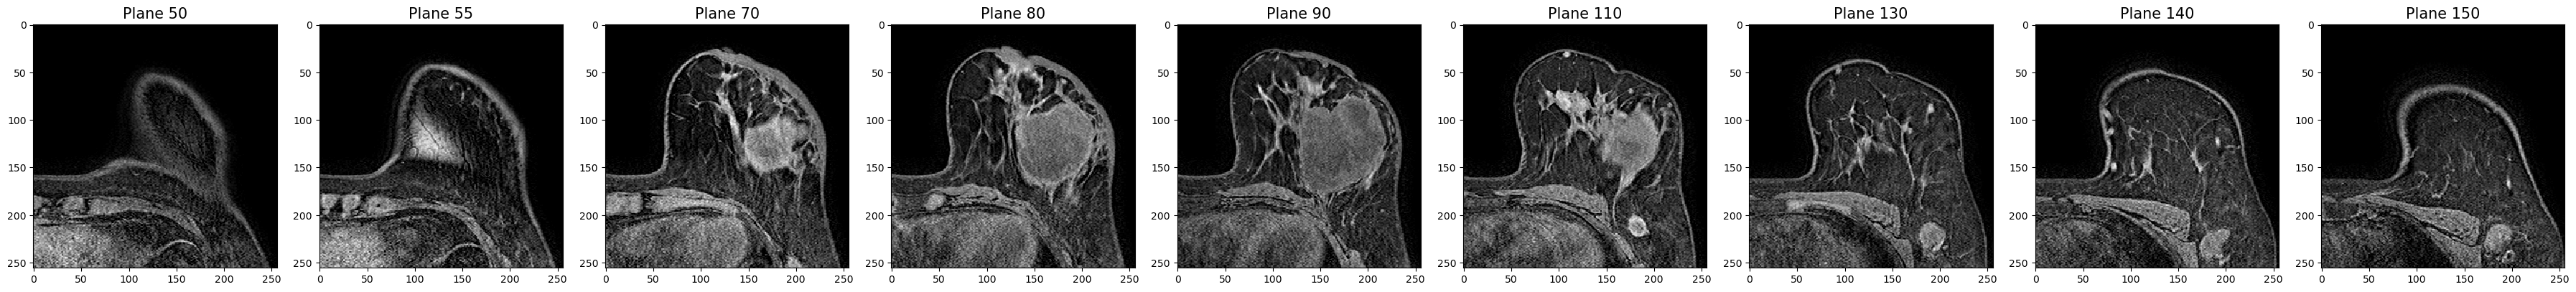

====  Scan:  1


<Figure size 640x480 with 0 Axes>

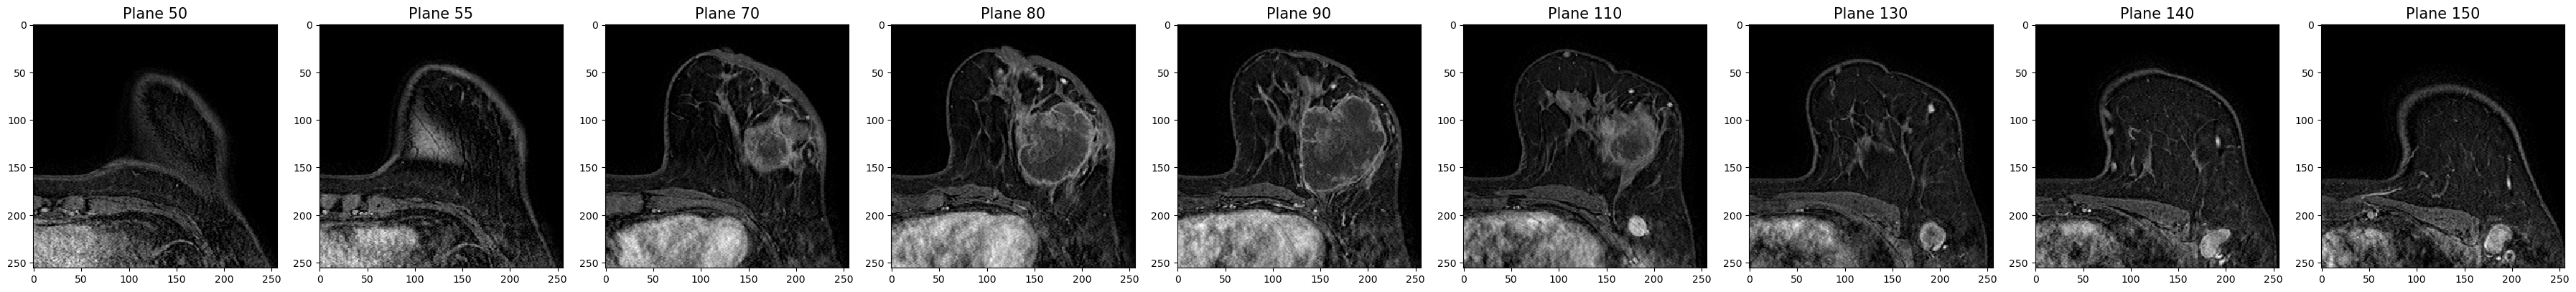

====  Scan:  2


<Figure size 640x480 with 0 Axes>

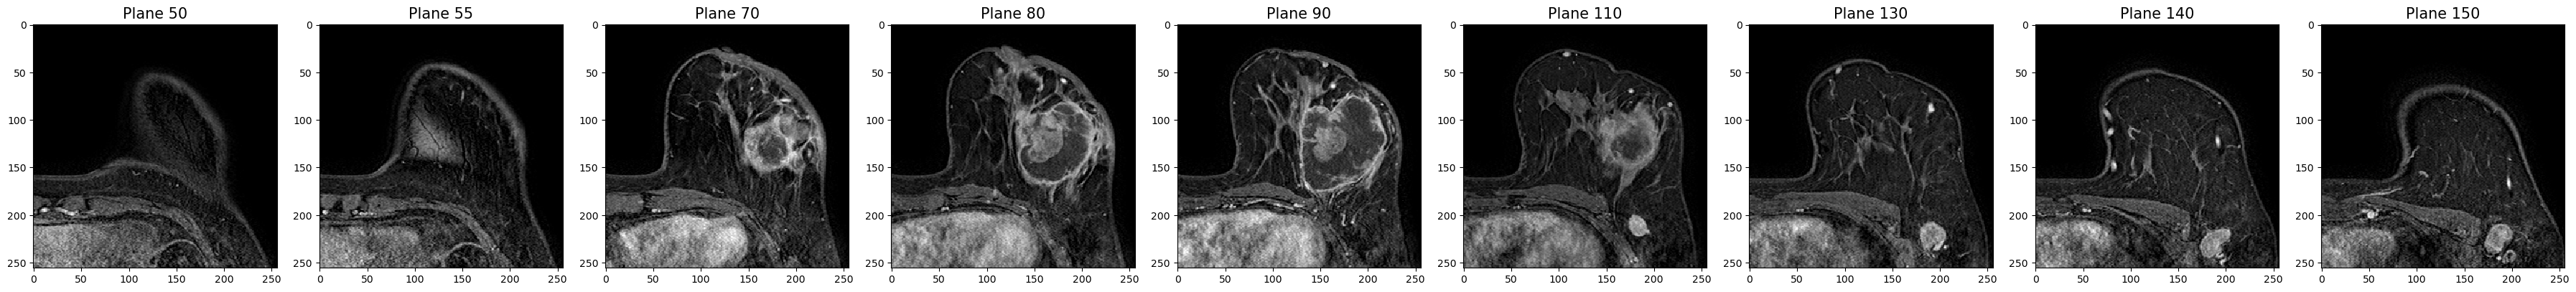

====  Scan:  3


<Figure size 640x480 with 0 Axes>

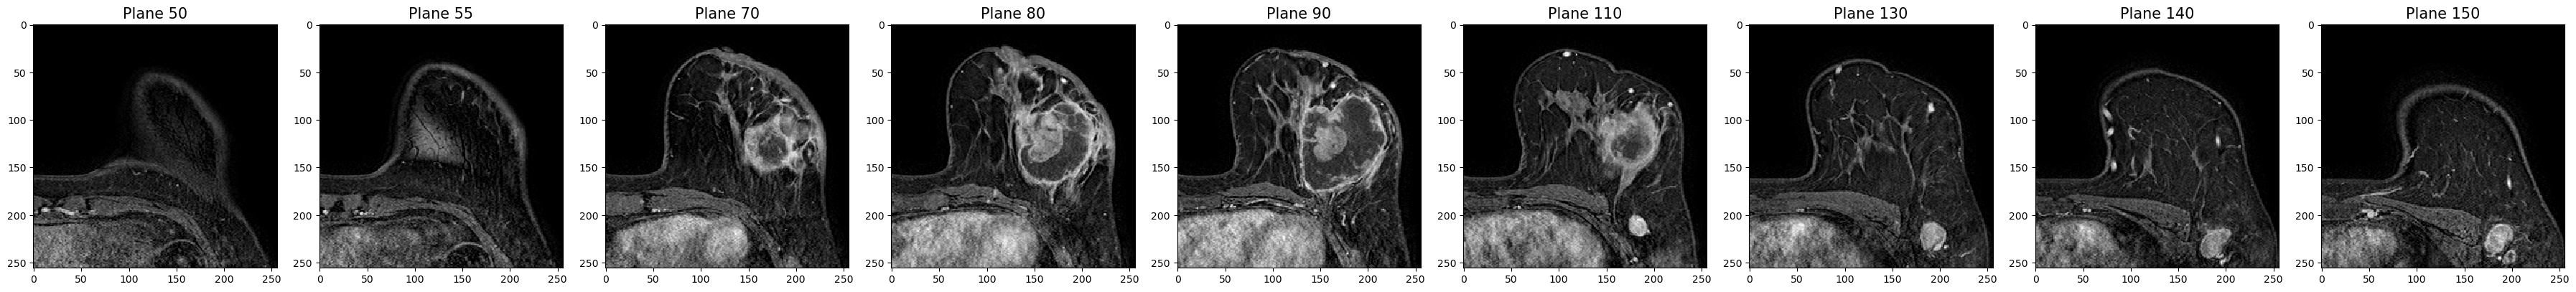

====  Scan:  4


<Figure size 640x480 with 0 Axes>

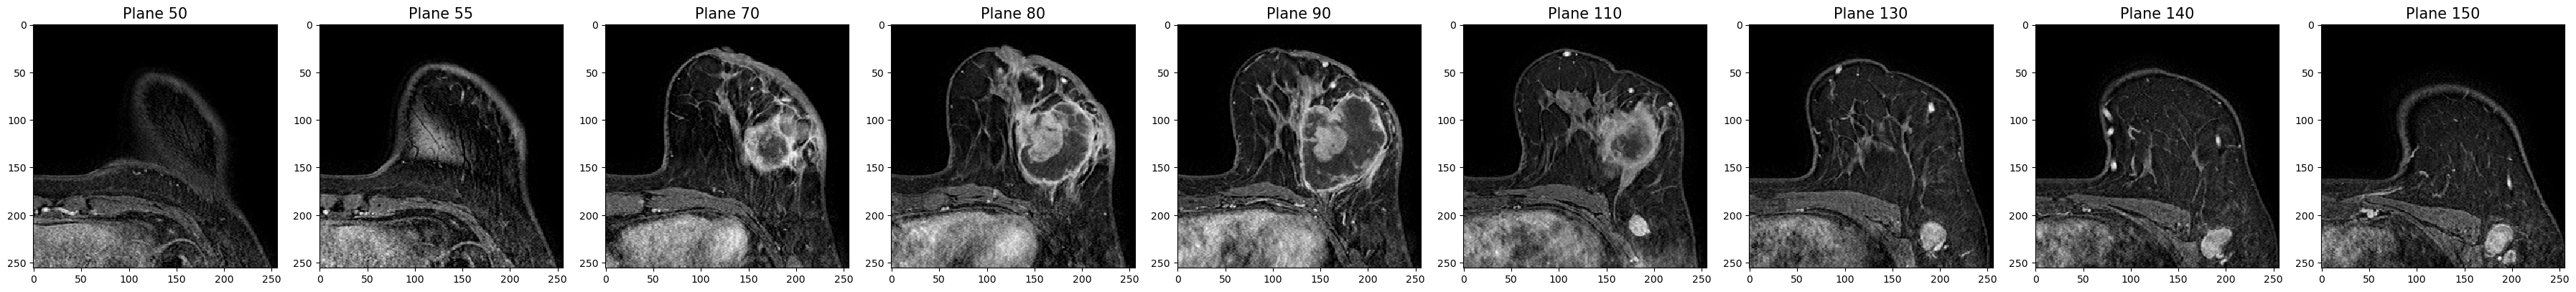

====  Scan:  5


<Figure size 640x480 with 0 Axes>

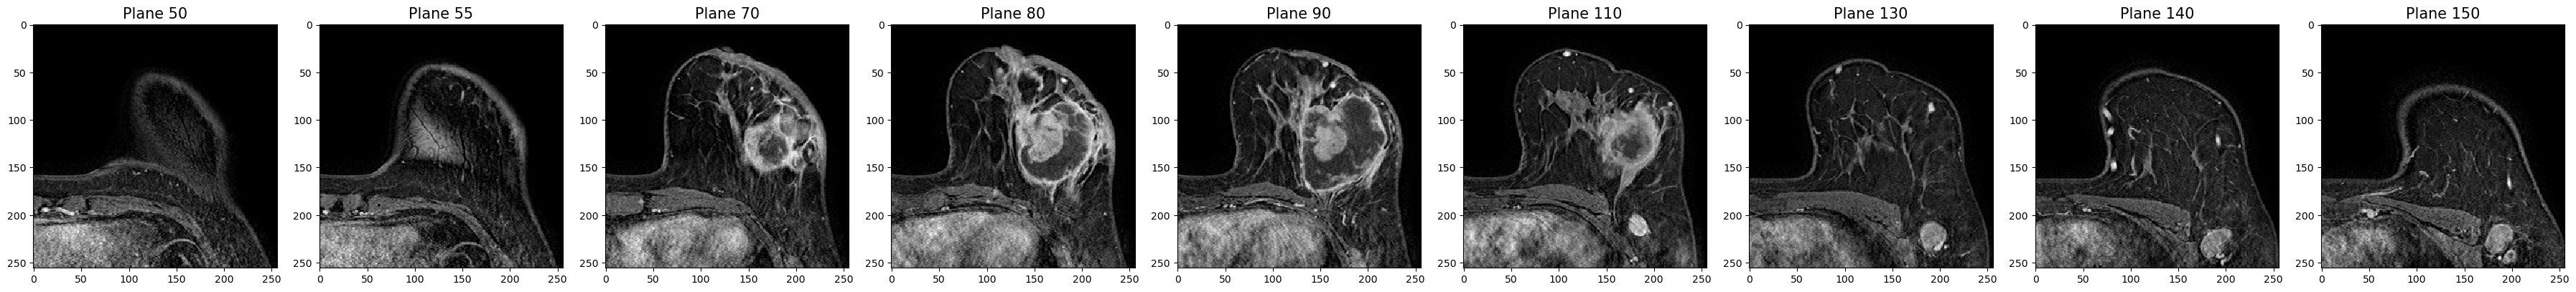

====  Scan:  6


<Figure size 640x480 with 0 Axes>

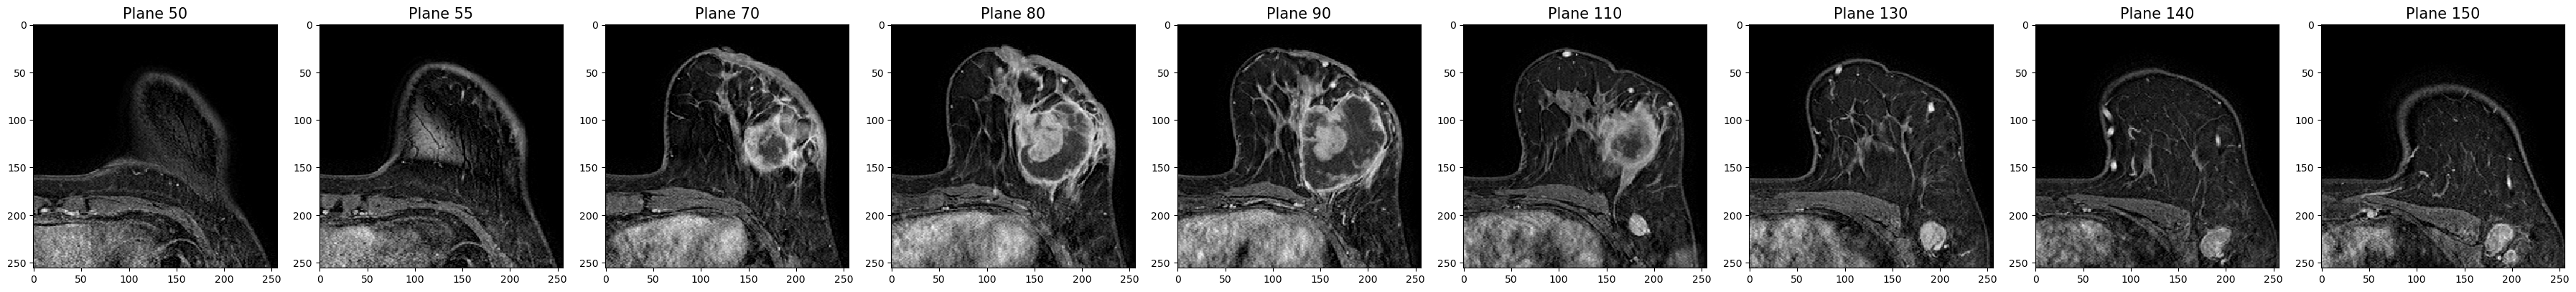

In [206]:
vox_sum=[]
for k in range(7):
    idx=[50,55,70,80,90,110,130,140,150]
    print('====  Scan: ', k)
    show_n_images([d[k][i] for i in idx], titles=['Plane '+str(i) for i in idx])
    vox_sum.append((d[k][80]*m[80]).sum())

In [207]:
for k in range(7):
    idx=[70,80,90]
    print('====  Scan: ', k)
    print_info([d[k][i] for i in idx])


====  Scan:  0
(256, 256) 0.0 1657.0 318.67979431152344 345.8875501507658 n!=0: 42296 493.7818942689616 float64
(256, 256) 0.0 1782.0 351.34779357910156 349.45898619777586 n!=0: 44361 519.0579337706544 float64
(256, 256) 0.0 1939.0 349.36671447753906 337.8391369222718 n!=0: 45422 504.07505173704374 float64
====  Scan:  1
(256, 256) 0.0 3471.0 499.7900695800781 663.9738036098612 n!=0: 42467 771.2869286740292 float64
(256, 256) 0.0 3377.0 567.7644653320312 683.4383590606257 n!=0: 44715 832.1371351895338 float64
(256, 256) 0.0 3408.0 573.0003204345703 669.9375097140735 n!=0: 45570 824.0541803818302 float64
====  Scan:  2
(256, 256) 0.0 2939.0 517.6082916259766 611.8072025751063 n!=0: 43234 784.6134292455013 float64
(256, 256) 0.0 3377.0 623.7575073242188 685.7535549638401 n!=0: 45193 904.5332684265262 float64
(256, 256) 0.0 3158.0 615.9249572753906 668.239484276139 n!=0: 46145 874.7482500812656 float64
====  Scan:  3
(256, 256) 0.0 3127.0 519.9720306396484 612.09841336772 n!=0: 43185 789.

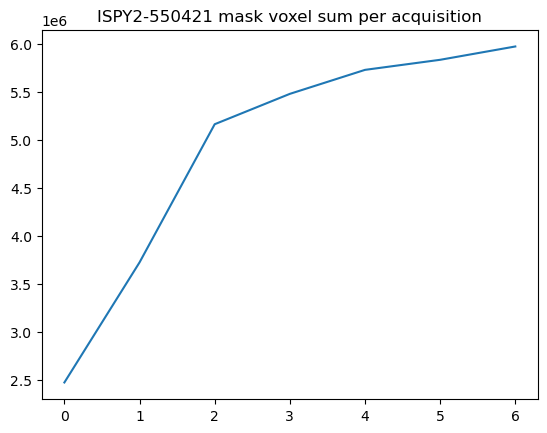

In [208]:
plt.plot(vox_sum)
plt.title('ISPY2-550421 mask voxel sum per acquisition')
plt.show()

# Read DICOM
### Load TCIA metadata

In [209]:
base_path = os.path.join("ISPY2","data_sample","dicom_tcia")

In [210]:
df = pd.read_csv(os.path.join('ISPY2','data_sample','dicom_tcia','metadata.csv'))
df.head()

Series UID  Collection  \
0  1.3.6.1.4.1.14519.5.2.1.7695.4164.136727379647...  ACRIN-6698   
1  1.3.6.1.4.1.14519.5.2.1.7695.4164.150176822414...  ACRIN-6698   
2  1.3.6.1.4.1.14519.5.2.1.7695.4164.168989778085...  ACRIN-6698   
3  1.3.6.1.4.1.14519.5.2.1.7695.4164.221395903073...  ACRIN-6698   
4  1.3.6.1.4.1.14519.5.2.1.7695.4164.101836283294...  ACRIN-6698   

  3rd Party Analysis                   Data Description URI  \
0                 NO  https://doi.org/10.7937/tcia.kk026d95   
1                 NO  https://doi.org/10.7937/tcia.kk026d95   
2                 NO  https://doi.org/10.7937/tcia.kk026d95   
3                 NO  https://doi.org/10.7937/tcia.kk026d95   
4                 NO  https://doi.org/10.7937/tcia.kk026d95   

          Subject ID                                          Study UID  \
0  ACRIN-6698-102212  1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...   
1  ACRIN-6698-102212  1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...   
2  ACRIN-6698-102212  1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...   
3  ACRIN-6698-102212  1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...   
4  ACRIN-6698-102212  1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...   

      Study Description  Study Date  \
0  ACRIN-6698ISPY2MRIT3  09-21-2002   
1  ACRIN-6698ISPY2MRIT3  09-21-2002   
2  ACRIN-6698ISPY2MRIT3  09-21-2002   
3  ACRIN-6698ISPY2MRIT3  09-21-2002   
4  ACRIN-6698ISPY2MRIT3  09-21-2002   

                               Series Description        Manufacturer  \
0  ISPY2 VOLSER uni-lateral cropped Analysis Mask  GE MEDICAL SYSTEMS   
1                 ISPY2 FATIDEAL T2FSEASSET no NP  GE MEDICAL SYSTEMS   
2                             ISPY2 3 Plane Scout  GE MEDICAL SYSTEMS   
3            ISPY2 VOLSER uni-lateral cropped SER  GE MEDICAL SYSTEMS   
4            ISPY2 VOLSER uni-lateral cropped PE6  GE MEDICAL SYSTEMS   

  Modality        SOP Class Name                 SOP Class UID  \
0      SEG  Segmentation Storage  1.2.840.10008.5.1.4.1.1.66.4   
1       MR      MR Image Storage     1.2.840.10008.5.1.4.1.1.4   
2       MR      MR Image Storage     1.2.840.10008.5.1.4.1.1.4   
3       MR      MR Image Storage     1.2.840.10008.5.1.4.1.1.4   
4       MR      MR Image Storage     1.2.840.10008.5.1.4.1.1.4   

   Number of Images File Size  \
0                 1   5.29 MB   
1                55  29.19 MB   
2                58   7.93 MB   
3                80  11.01 MB   
4                80  10.93 MB   

                                       File Location       Download Timestamp  
0  .\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...  2022-06-14T13:50:23.114  
1  .\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...  2022-06-14T13:50:36.885  
2  .\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...  2022-06-14T13:50:58.012  
3  .\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...  2022-06-14T13:51:05.683  
4  .\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...   2022-06-14T13:51:20.16

In [211]:
def get_visit(x):
    if x[-2:] == 'T0':
        return 'T0'
    elif x[-2:] == 'T1':
        return 'T1'
    elif x[-2:] == 'T2':
        return 'T2'
    elif x[-2:] == 'T3':
        return 'T3'

## Filter Pre Treatment visit

In [212]:
df['Study Description'] = df['Study Description'].apply(lambda x: get_visit(x))

df['Study Description'].value_counts()

df=df[df['Study Description']=='T0']

In [213]:
!ls ISPY2/data_sample/dicom_tcia

ACRIN-6698
ISPY2
metadata.csv


# Analize few example cases

In [214]:
pds = 'ACRIN-6698-378885'
pdg = 'ISPY2-211408'
pdph = 'ISPY2-550421'

### Read Dynamic Contrast MRI for ISPY2-550421

In [216]:
tmp=df[df['Subject ID']==pdph]
tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']


Series UID Collection  \
27753  1.3.6.1.4.1.14519.5.2.1.2391467408296345373628...      ISPY2   

      3rd Party Analysis                   Data Description URI    Subject ID  \
27753                 NO  https://doi.org/10.7937/TCIA.D8Z09T85  ISPY2-550421   

                                               Study UID Study Description  \
27753  1.3.6.1.4.1.14519.5.2.1.9261051656703003861157...                T0   

       Study Date                             Series Description  \
27753  04-13-2003  ISPY2 VOLSER uni-lateral cropped original DCE   

                  Manufacturer Modality    SOP Class Name  \
27753  Philips Medical Systems       MR  MR Image Storage   

                   SOP Class UID  Number of Images  File Size  \
27753  1.2.840.10008.5.1.4.1.1.4              1120  150.81 MB   

                                           File Location  \
27753  .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...   

            Download Timestamp  
27753  2022-06-23T04:30:18.087

In [217]:
fname = tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']['File Location'].values[0]
fname

'.\\ISPY2\\ISPY2-550421\\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\\1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161'

In [218]:
join_path(base_path, fname)

ISPY2\data_sample\dicom_tcia .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161


'ISPY2\\data_sample\\dicom_tcia\\.\\ISPY2\\ISPY2-550421\\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\\1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161'

In [219]:
os.listdir(join_path(base_path, fname))

ISPY2\data_sample\dicom_tcia .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161


['1-0001.dcm',
 '1-0002.dcm',
 '1-1116.dcm',
 '1-1117.dcm',
 '1-1118.dcm',
 '1-1119.dcm',
 '1-1120.dcm']

## Dynamic Contrast MRI Scan Details for ISPY2-550421

- **Total Slices:** 1120  
- **Number of MRI Scans:** 7  
- **Slices per MRI Scan:** 1120 / 7 = **160 slices per scan**  

#### **Acquisition Timing**
- The **first scan** is taken **before contrast injection**.  
- The **remaining 6 scans** are acquired **after injection**, with a time interval of approximately **1.5 minutes** between each.  

#### **Processing Steps**
1. **Group slices by acquisition time** (i.e., pre-contrast and post-contrast phases).  
2. **Order slices spatially** based on their anatomical position to ensure correct reconstruction.  


## 1. **Group slices by acquisition time** (i.e., pre-contrast and post-contrast phases).  

In [220]:
d=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-0001.dcm'))
d

ISPY2\data_sample\dicom_tcia .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.112536240787848205223290395402236478818
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'DYNAMIC', 'NONE']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.112536240787848205

## Dicom Temporal information
### slice 1-0001.dcm
```
(0020,0013) Instance Number                     IS: '1'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 62.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,0060) Laterality                          CS: 'L'
(0020,0100) Temporal Position Identifier        IS: '0'
(0020,0105) Number of Temporal Positions        IS: '6'
(0020,1040) Position Reference Indicator        LO: ''
(0020,1041) Slice Location                      DS: '213'

(0117,1030) Private tag data                    IS: '7'  # Total phases Number
(0117,1031) Private tag data                    DS: '81.832862854'   # Single phase acquisition duration
(0117,1033) Private tag data                    TM: '073158.20'   # Injection time
# phase encoding effective time half way through the acquisition
(0117,1034) Private tag data                    DS: [-73.8535614014, 40.916431427, 122.2864379883, 203.6464233398, 285.006439209, 366.3764343262, 447.7364501953]
```

### **Understanding the Timing of Scans and Contrast Injection in Dynamic Contrast-Enhanced MRI (DCE-MRI)**

In **DCE-MRI**, multiple image acquisitions (phases) are taken over time **before and after** a contrast agent injection. Your DICOM metadata contains important timing information regarding when the scans are taken relative to the contrast injection.

---

## **Temporal Key DICOM Tags**
### **1️⃣ Total Phases Number (0117,1030) - Private Tag**
- **Type:** `IS` (Integer String)
- **Example Value:** `'7'`
- **Meaning:** This represents the **total number of acquisitions (phases)** in the DCE-MRI study, including **one pre-contrast phase** and **multiple post-contrast phases**.

**Interpretation**:  
- `'7'` means **one pre-contrast** and **six post-contrast** phases were acquired.
- These phases are acquired at different time points **before and after** contrast injection.

---

### **2️⃣ Single Phase Acquisition Duration (0117,1031) - Private Tag**
- **Type:** `DS` (Decimal String)
- **Example Value:** `'81.832862854'` (in seconds)
- **Meaning:** Duration of a **single acquisition phase**.

**Interpretation**:  
- Each phase takes **81.83 seconds** to acquire.
- If there are 7 phases, the total scan time will be **approximately** `7 × 81.83 ≈ 573 seconds (9.5 minutes)`.

---

### **3️⃣ Injection Time (0117,1033) - Private Tag**
- **Type:** `TM` (Time)
- **Example Value:** `'073158.20'` (HHMMSS.FF)
- **Meaning:** The **exact scanner clock time** when contrast injection was administered.

**Interpretation**:  
- The contrast injection happened at **07:31:58.20 AM**.
- This time acts as the **reference point** for determining post-contrast acquisitions.

---

### **4️⃣ Effective Acquisition Delay (0117,1034) - Private Tag**
- **Type:** `DS (1-n)` (List of Decimal Strings)
- **Example Value:**
  ```plaintext
  [-73.85, 40.91, 122.28, 203.65, 285.00, 366.37, 447.73]
  ```
- **Meaning:** Time delays (in seconds) relative to **the first post-contrast phase**.

**Interpretation**:  
- **Negative values (`-73.85`)** indicate pre-contrast acquisition (`~74 sec before injection`).
- **Positive values (`40.91`, `122.28`, etc.)** indicate post-contrast acquisitions at these time points after injection.

---

### **5️⃣ Number of Temporal Positions (0020,0105)**
- **Type:** `IS` (Integer String)
- **Example Value:** `'6'`
- **Meaning:** The **number of distinct time points** recorded in this dynamic MRI scan.

**Interpretation**:  
- There are **6 temporal positions**, which correspond to the number of post-contrast scans.

---

## **When Are the Scans Taken**
Based on these values, here’s the approximate timeline of the scan:

| **Phase** | **Time (seconds)** | **Relative to Injection** |
|-----------|------------------|----------------------|
| **Pre-Contrast** | `-73.85` sec | **Before injection** |
| **1st Post-Contrast** | `40.91` sec | **40.91 sec after injection** |
| **2nd Post-Contrast** | `122.28` sec | **122.28 sec after injection** |
| **3rd Post-Contrast** | `203.65` sec | **203.65 sec after injection** |
| **4th Post-Contrast** | `285.00` sec | **285 sec after injection** |
| **5th Post-Contrast** | `366.37` sec | **366.37 sec after injection** |
| **6th Post-Contrast** | `447.73` sec | **447.73 sec after injection** |

---

### **Summary of Timing & Injection Process**
1. **A pre-contrast scan** is taken **~74 seconds before** contrast injection.
2. **Contrast is injected at** `07:31:58.20 AM`.
3. **Post-contrast scans are taken** at different time points after injection (`40.91 sec`, `122.28 sec`, etc.).
4. The **total number of phases** (scans) is **7** (1 pre-contrast + 6 post-contrast).
5. **Each phase acquisition takes** `81.83 sec`.

---

### **Why This Matters in DCE-MRI**
- The **first post-contrast scan** shows **early enhancement** (blood supply to tissues).
- Later phases help differentiate **benign vs. malignant** lesions based on **washout curves**.
- **Temporal Position Identifier (0020,0100)** tells us which phase each image belongs to.


In [221]:
d=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-0002.dcm'))
d

ISPY2\data_sample\dicom_tcia .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 204
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6955632577893836251226799912786684492
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'DYNAMIC', 'NONE']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.69556325778938362512

## 2. **Order slices spatially** based on their anatomical position to ensure correct reconstruction.  

### Dicom spatial information
### slice 1-0001.dcm
```
(0020,0013) Instance Number                     IS: '1'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 62.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,1041) Slice Location                      DS: '213'
```

### slice 1-0002.dcm
```
(0020,0013) Instance Number                     IS: '2'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 61.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,1041) Slice Location                      DS: '214'
```

### slice 1-1116.dcm
```
(0020,0013) Instance Number                     IS: '1116'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, -92.8644638062]
(0020,1041) Slice Location                      DS: '368'

* slicw 1: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, 62.1355361938]
* slice 2: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, 61.1355361938]
* slice 1116: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, -92.8644638062]

### **Positioning Tags in DICOM**
These tags provide information about the **spatial location and orientation** of the image within the 3D coordinate system of the patient.

---

## **1️⃣ (0020,0032) Image Position (Patient)**
- **Type:** `DS (Decimal String)` – 3 values in millimeters `(X, Y, Z)`
- **Example Value:** `[-20.2284866531, -133.1898132546, 62.1355361938]`
- **Meaning:** This gives the **coordinates of the center of the top-left pixel** (first row, first column) **in the DICOM 3D coordinate system**.

**How It Works:**
- The **DICOM coordinate system** follows:
  - **X**: Left (-) to Right (+)
  - **Y**: Posterior (-) to Anterior (+)
  - **Z**: Inferior (-) to Superior (+)

**Interpretation of the Example:**
- **X = -20.23 mm** → The image is **20.23 mm left** of the reference point.
- **Y = -133.19 mm** → The image is **133.19 mm posterior (towards the back)**.
- **Z = 62.14 mm** → The image is **62.14 mm above the reference point**.

## 2️⃣  (0020,1041) Slice Location in DICOM

🔹 **Tag:** `(0020,1041)`  
🔹 **Type:** `DS (Decimal String)`  
🔹 **Example Value:** `'213'`  
🔹 **Meaning:** Represents the **relative position** of the image slice along the **Z-axis (Superior-Inferior direction)**.

### 🔹 How is Slice Location (0020,1041) Used?

#### **🔹 Relative Positioning**
- `Slice Location` is often used for **sorting slices** in **sequential imaging** (e.g., MRI or CT scans).  
- It provides a **reference value** (not absolute) to determine if a slice is positioned **higher or lower** compared to others.

#### **🔹 Comparison with Image Position (0020,0032)**
- **Image Position (Patient) `(0020,0032)`** provides the **absolute position** in **millimeters** within the patient’s coordinate system.  
- **Slice Location `(0020,1041)`** is often a **simplified or derived value** used for sorting slices within a series.

#### **🔹 Usage in Multi-Phase Imaging (DCE-MRI)**
- Since **(0020,0100) Temporal Position Identifier = '0'**, this is likely the **first temporal position** in a **dynamic contrast-enhanced MRI** scan.  
- The **Slice Locatio



In [299]:
pds = 'ACRIN-6698-378885'
pdg = 'ISPY2-211408'
pdph = 'ISPY2-550421'

# Convert data for: ACRIN-6698-378885

### Read Analysis mask of MRI for ACRIN-6698-378885

In [300]:
tmp=df[df['Subject ID']==pds]
tmp[tmp['Series Description'].str.contains('Analysis Mask')]


Series UID  Collection  \
3642  1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358...  ACRIN-6698   

     3rd Party Analysis                   Data Description URI  \
3642                 NO  https://doi.org/10.7937/tcia.kk026d95   

             Subject ID                                          Study UID  \
3642  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   

     Study Description  Study Date                     Series Description  \
3642                T0  07-29-2001  ISPY2 VOLSER bi-lateral Analysis Mask   

     Manufacturer Modality        SOP Class Name  \
3642      SIEMENS      SEG  Segmentation Storage   

                     SOP Class UID  Number of Images File Size  \
3642  1.2.840.10008.5.1.4.1.1.66.4                 1  23.68 MB   

                                          File Location  \
3642  .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...   

           Download Timestamp  
3642  2022-06-15T18:51:01.088

In [250]:
fname = tmp[tmp['Series Description'].str.contains('Analysis Mask')]['File Location'].values[0]

In [279]:
!dir ISPY2\data_sample\dicom_tcia\ACRIN-6698

 Volume in drive C is OS
 Volume Serial Number is 689B-3B85

 Directory of C:\Users\naomi\Downloads\breast_mri\BreastDCEDL\BreastDCEDL\ISPY2\data_sample\dicom_tcia\ACRIN-6698

02/12/2025  12:11 AM    <DIR>          .
02/13/2025  10:52 AM    <DIR>          ..
               0 File(s)              0 bytes
               2 Dir(s)  863,899,602,944 bytes free


In [ ]:
Here is the **Breast Cancer Diagnosis and Management Stages** diagram with **reduced spacing** between lines for better readability.  

🔹 **Improvements:**
- **Tighter spacing** between exam descriptions.
- **Smaller padding** around each block.
- **Clear, structured layout** while keeping it simple.  

Let me know if you’d like any further adjustments! 🚀😊

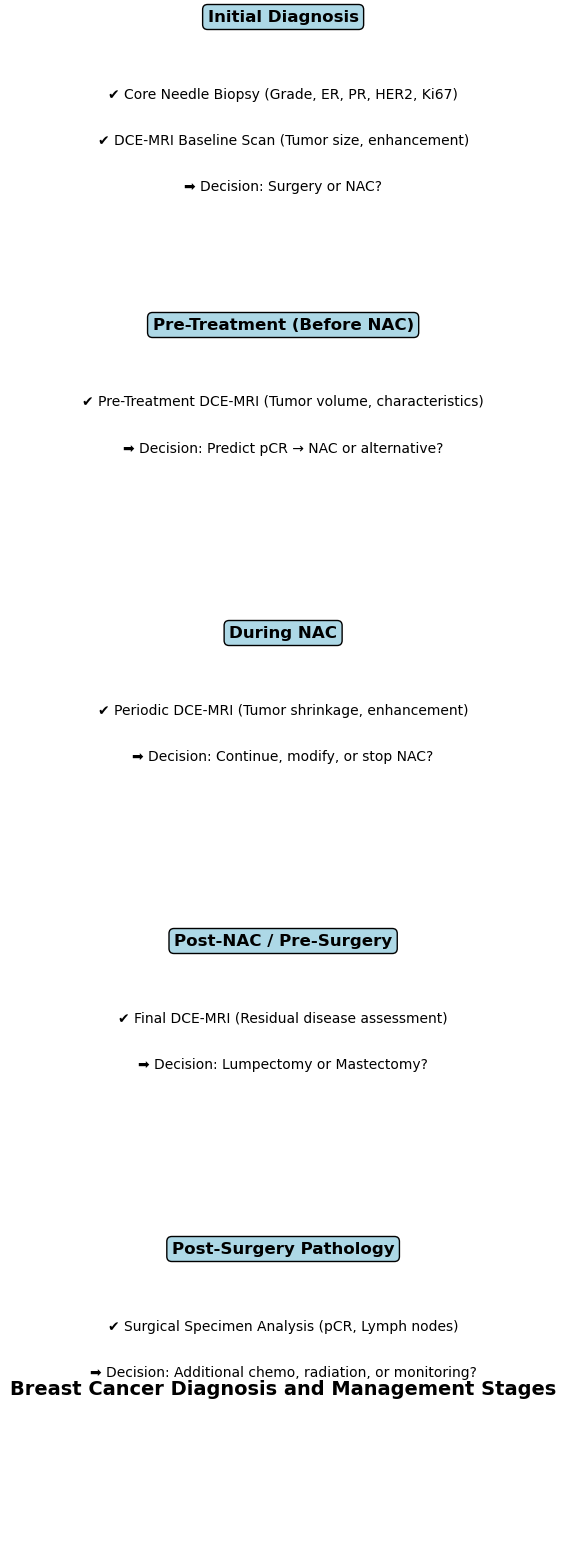

In [287]:
# Re-import necessary libraries since execution state was reset
import matplotlib.pyplot as plt

# Define the stages and their corresponding labels
stages = [
    "Initial Diagnosis", 
    "Pre-Treatment (Before NAC)", 
    "During NAC", 
    "Post-NAC / Pre-Surgery", 
    "Post-Surgery Pathology"
]

# Define exams and decisions at each stage
details = {
    "Initial Diagnosis": [
        "✔ Core Needle Biopsy (Grade, ER, PR, HER2, Ki67)",
        "✔ DCE-MRI Baseline Scan (Tumor size, enhancement)",
        "➡ Decision: Surgery or NAC?"
    ],
    "Pre-Treatment (Before NAC)": [
        "✔ Pre-Treatment DCE-MRI (Tumor volume, characteristics)",
        "➡ Decision: Predict pCR → NAC or alternative?"
    ],
    "During NAC": [
        "✔ Periodic DCE-MRI (Tumor shrinkage, enhancement)",
        "➡ Decision: Continue, modify, or stop NAC?"
    ],
    "Post-NAC / Pre-Surgery": [
        "✔ Final DCE-MRI (Residual disease assessment)",
        "➡ Decision: Lumpectomy or Mastectomy?"
    ],
    "Post-Surgery Pathology": [
        "✔ Surgical Specimen Analysis (pCR, Lymph nodes)",
        "➡ Decision: Additional chemo, radiation, or monitoring?"
    ]
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(2, 2))  # Reduce height to remove extra spacing

# Plot blocks with reduced spacing
y_positions = list(range(len(stages) * 2, 0, -2))  # Reduce gap between blocks
for i, stage in enumerate(stages):
    ax.text(0.5, y_positions[i], stage, fontsize=12, fontweight="bold",
            ha="center", va="center", bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.3"))

    # Add details below each block with reduced spacing
    y_text = y_positions[i] - 0.5  # Decrease space between lines
    for detail in details[stage]:
        ax.text(0.5, y_text, detail, fontsize=10, ha="center", va="center")
        y_text -= 0.3  # Reduce spacing between lines

# Remove axes and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.title("Breast Cancer Diagnosis and Management Stages", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


In [272]:
base_path = os.path.join("ISPY2","data_sample","dicom_tcia")

In [273]:
os.path.join(base_path, fname)

'ISPY2\\data_sample\\.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803'

In [288]:
import shutil
import os

# Define source and destination paths
src_dir = join_path(org_path, fname) #r"C:\Users\naomi\Downloads\breast_mri\BreastDCEDL\ISPY2\data_sample\dicom_tcia"
dest_dir = join_path(base_path, fname) #r"D:\Backup\breast_mri\BreastDCEDL\ISPY2\data_sample\dicom_tcia"  # New location

# Ensure parent directory exists before copying
os.makedirs(os.path.dirname(dest_dir), exist_ok=True)

# Copy the entire directory
shutil.copytree(src_dir, dest_dir, dirs_exist_ok=True)  # `dirs_exist_ok=True` allows overwriting

print(f"Directory copied from:\n{src_dir}\nto\n{dest_dir}")


D:\SPY\manifest-1636041418053\ .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803
ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803
Directory copied from:
D:\SPY\manifest-1636041418053\.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803
to
ISPY2\data_sample\.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803


In [289]:
os.listdir(join_path(base_path, fname))

ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803


['1-1.dcm']

In [290]:
org_path = "D:\\SPY\\manifest-1636041418053\\"

In [291]:
os.listdir(join_path(org_path, fname))

D:\SPY\manifest-1636041418053\ .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803


['1-1.dcm']

In [292]:
os.listdir(join_path(base_path,
               "ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803"))

ISPY2\data_sample ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803


['1-1.dcm']

In [293]:
mask_dcm=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-1.dcm'))
mask_dcm

ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Segmentation Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.120968937471932006539352380190
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008,0016) SOP Class UID                       UI: Segmentation Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.1209689374719320065

### Mask dicom contains the positions of all the slices
```
 (0020,9111)  Frame Content Sequence  1 item(s) ---- 
      (0020,9057) In-Stack Position Number            UL: 160
      
      ---------
   (0020,9113)  Plane Position Sequence  1 item(s) ----
      (0020,0032) Image Position (Patient)            DS: [-152.6144414256, -167.5486850431, -78.4195278883]
      ---------
   ---------
 (0020,9111)  Frame Content Sequence  1 item(s) ----
      (0020,9057) In-Stack Position Number            UL: 108
      ---------
   (0020,9113)  Plane Position Sequence  1 item(s) ----
      (0020,0032) Image Position (Patient)            DS: [-152.6144414256, -167.5486850431, -26.4195278883]
```

In [322]:
mask_dcm.pixel_array.shape

(160, 384, 384)

In [294]:
df_pos = extract_image_positions(mask_dcm)
df_pos.head()

Frame          X          Y        Z
0      0 -152.61444 -167.54869 80.58047
1      1 -152.61444 -167.54869 79.58047
2      2 -152.61444 -167.54869 78.58047
3      3 -152.61444 -167.54869 77.58047
4      4 -152.61444 -167.54869 76.58047

In [295]:
df_pos.tail()

Frame          X          Y         Z
155    155 -152.61444 -167.54869 -74.41953
156    156 -152.61444 -167.54869 -75.41953
157    157 -152.61444 -167.54869 -76.41953
158    158 -152.61444 -167.54869 -77.41953
159    159 -152.61444 -167.54869 -78.41953

In [296]:
pd.set_option("display.float_format", "{:.5f}".format)


In [297]:
df_pos.describe()

Frame          X          Y         Z
count 160.00000  160.00000  160.00000 160.00000
mean   79.50000 -152.61444 -167.54869   1.08047
std    46.33213    0.00000    0.00000  46.33213
min     0.00000 -152.61444 -167.54869 -78.41953
25%    39.75000 -152.61444 -167.54869 -38.66953
50%    79.50000 -152.61444 -167.54869   1.08047
75%   119.25000 -152.61444 -167.54869  40.83047
max   159.00000 -152.61444 -167.54869  80.58047

In [339]:
df.columns

Index(['pid', 'n_xy', 'n_z', 'n_times', 'pre', 'post_early', 'post_late',
       'pix_type', 'slice_thick', 'slice_space', 'xy_spacing', 'mask_start',
       'mask_end', 'age', 'r_white', 'r_black', 'mask_count', 'mask_max',
       'pCR', 'HR', 'MP', 'HRposHER2neg', 'HER2pos', 'TripleNeg', 'test'],
      dtype='object')

In [338]:
df[df.pid==pds][[]]

pid  n_xy  n_z  n_times     pre  post_early  post_late  \
87  ACRIN-6698-378885   384  160        7 0.00000     2.00000    5.00000   

   pix_type  slice_thick  slice_space  ...  r_black  mask_count  mask_max  \
87   uint16      1.00000      1.00000  ...  0.00000 12639.00000  62.00000   

    pCR  HR  MP  HRposHER2neg  HER2pos  TripleNeg    test  
87    0   1   0             1        0          0 2.00000  

[1 rows x 25 columns]

## Read Dynamic Contrast MRI for ACRIN-6698-378885
* mask shape is (160, 384, 384) meanning there are no cropped ROI
> only images larger then 384x384 are being cropped
We need to identify the DCE MRI 

In [323]:
tmp=df[df['Subject ID']==pds]
#tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']
tmp


Series UID  Collection  \
3642  1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358...  ACRIN-6698   
3644  1.3.6.1.4.1.14519.5.2.1.7695.4164.174279586810...  ACRIN-6698   
3645  1.3.6.1.4.1.14519.5.2.1.7695.4164.239204556963...  ACRIN-6698   
3646  1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556...  ACRIN-6698   
3647  1.3.6.1.4.1.14519.5.2.1.7695.4164.246717800642...  ACRIN-6698   
3648  1.3.6.1.4.1.14519.5.2.1.7695.4164.257031636630...  ACRIN-6698   
3649  1.3.6.1.4.1.14519.5.2.1.7695.4164.114750542965...  ACRIN-6698   
3650  1.3.6.1.4.1.14519.5.2.1.7695.4164.261133529403...  ACRIN-6698   
3651  1.3.6.1.4.1.14519.5.2.1.7695.4164.267805933770...  ACRIN-6698   
3652  1.3.6.1.4.1.14519.5.2.1.7695.4164.272365569345...  ACRIN-6698   
3653  1.3.6.1.4.1.14519.5.2.1.7695.4164.266298627685...  ACRIN-6698   
3655  1.3.6.1.4.1.14519.5.2.1.7695.4164.354481316559...  ACRIN-6698   
3656  1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758...  ACRIN-6698   

     3rd Party Analysis                   Data Description URI  \
3642                 NO  https://doi.org/10.7937/tcia.kk026d95   
3644                 NO  https://doi.org/10.7937/tcia.kk026d95   
3645                 NO  https://doi.org/10.7937/tcia.kk026d95   
3646                 NO  https://doi.org/10.7937/tcia.kk026d95   
3647                 NO  https://doi.org/10.7937/tcia.kk026d95   
3648                 NO  https://doi.org/10.7937/tcia.kk026d95   
3649                 NO  https://doi.org/10.7937/tcia.kk026d95   
3650                 NO  https://doi.org/10.7937/tcia.kk026d95   
3651                 NO  https://doi.org/10.7937/tcia.kk026d95   
3652                 NO  https://doi.org/10.7937/tcia.kk026d95   
3653                 NO  https://doi.org/10.7937/tcia.kk026d95   
3655                 NO  https://doi.org/10.7937/tcia.kk026d95   
3656                 NO  https://doi.org/10.7937/tcia.kk026d95   

             Subject ID                                          Study UID  \
3642  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3644  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3645  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3646  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3647  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3648  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3649  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3650  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3651  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3652  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3653  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3655  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3656  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   

     Study Description  Study Date                     Series Description  \
3642                T0  07-29-2001  ISPY2 VOLSER bi-lateral Analysis Mask   
3644                T0  07-29-2001            ISPY2 VOLSER bi-lateral PE5   
3645                T0  07-29-2001            ISPY2 VOLSER bi-lateral PE2   
3646                T0  07-29-2001              ISPY2 T13DFL AX DYN C NEW   
3647                T0  07-29-2001              ISPY2 T13DFL AX DYN C NEW   
3648                T0  07-29-2001              ISPY2 T13DFL AX DYN C NEW   
3649                T0  07-29-2001   ISPY2 VOLSER bi-lateral original DCE   
3650                T0  07-29-2001              ISPY2 T13DFL AX DYN C NEW   
3651                T0  07-29-2001                       ISPY2 T2 TIRM AX   
3652                T0  07-29-2001            ISPY2 VOLSER bi-lateral SER   
3653                T0  07-29-2001              ISPY2 T13DFL AX DYN C NEW   
3655                T0  07-29-2001              ISPY2 T13DFL AX DYN C NEW   
3656                T0  07-29-2

In [324]:
tmp=df[df['Subject ID']==pds]
#tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']
tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]


Series UID  Collection  \
3646  1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556...  ACRIN-6698   
3647  1.3.6.1.4.1.14519.5.2.1.7695.4164.246717800642...  ACRIN-6698   
3648  1.3.6.1.4.1.14519.5.2.1.7695.4164.257031636630...  ACRIN-6698   
3650  1.3.6.1.4.1.14519.5.2.1.7695.4164.261133529403...  ACRIN-6698   
3653  1.3.6.1.4.1.14519.5.2.1.7695.4164.266298627685...  ACRIN-6698   
3655  1.3.6.1.4.1.14519.5.2.1.7695.4164.354481316559...  ACRIN-6698   
3656  1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758...  ACRIN-6698   

     3rd Party Analysis                   Data Description URI  \
3646                 NO  https://doi.org/10.7937/tcia.kk026d95   
3647                 NO  https://doi.org/10.7937/tcia.kk026d95   
3648                 NO  https://doi.org/10.7937/tcia.kk026d95   
3650                 NO  https://doi.org/10.7937/tcia.kk026d95   
3653                 NO  https://doi.org/10.7937/tcia.kk026d95   
3655                 NO  https://doi.org/10.7937/tcia.kk026d95   
3656                 NO  https://doi.org/10.7937/tcia.kk026d95   

             Subject ID                                          Study UID  \
3646  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3647  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3648  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3650  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3653  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3655  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   
3656  ACRIN-6698-378885  1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...   

     Study Description  Study Date         Series Description Manufacturer  \
3646                T0  07-29-2001  ISPY2 T13DFL AX DYN C NEW      SIEMENS   
3647                T0  07-29-2001  ISPY2 T13DFL AX DYN C NEW      SIEMENS   
3648                T0  07-29-2001  ISPY2 T13DFL AX DYN C NEW      SIEMENS   
3650                T0  07-29-2001  ISPY2 T13DFL AX DYN C NEW      SIEMENS   
3653                T0  07-29-2001  ISPY2 T13DFL AX DYN C NEW      SIEMENS   
3655                T0  07-29-2001  ISPY2 T13DFL AX DYN C NEW      SIEMENS   
3656                T0  07-29-2001  ISPY2 T13DFL AX DYN C NEW      SIEMENS   

     Modality    SOP Class Name              SOP Class UID  Number of Images  \
3646       MR  MR Image Storage  1.2.840.10008.5.1.4.1.1.4               160   
3647       MR  MR Image Storage  1.2.840.10008.5.1.4.1.1.4               160   
3648       MR  MR Image Storage  1.2.840.10008.5.1.4.1.1.4               160   
3650       MR  MR Image Storage  1.2.840.10008.5.1.4.1.1.4               160   
3653       MR  MR Image Storage  1.2.840.10008.5.1.4.1.1.4               160   
3655       MR  MR Image Storage  1.2.840.10008.5.1.4.1.1.4               160   
3656       MR  MR Image Storage  1.2.840.10008.5.1.4.1.1.4               160   

     File Size                                      File Location  \
3646  47.85 MB  .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...   
3647  47.85 MB  .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...   
3648  47.85 MB  .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...   
3650  47.85 MB  .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...   
3653  47.85 MB  .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...   
3655  47.85 MB  .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...   
3656  47.85 MB  .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...   

           Download Timestamp  
3646  2022-06-15T18:51:58.005  
3647  2022-06-15T18:52:08.849  
3648  2022-06-15T18:52:32.326  
3650  2022-06-15T18:52:34.412  
3653   2022-06-15T18:53:12.43  
3655  2022-06-15T18:53:50.962  
3656  2022-06-15T18:53:52.484

In [ ]:
7 directories with 160 images each, lets read one dicom to see the information

In [325]:
fname = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[0]
fname

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556040715451014556143'

In [349]:
fnamel = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[-1]
fnamel

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758966661452184056561'

In [371]:
import shutil
import os

# Define source and destination paths
src_dir = join_path(org_path, fname6)
dest_dir = join_path(base_path, fname6) # New location

# Ensure parent directory exists before copying
os.makedirs(os.path.dirname(dest_dir), exist_ok=True)

# Copy the entire directory
shutil.copytree(src_dir, dest_dir, dirs_exist_ok=True)  # `dirs_exist_ok=True` allows overwriting

print(f"Directory copied from:\n{src_dir}\nto\n{dest_dir}")


D:\SPY\manifest-1636041418053\ .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758966661452184056561
ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758966661452184056561
Directory copied from:
D:\SPY\manifest-1636041418053\.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758966661452184056561
to
ISPY2\data_sample\.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758966661452184056561


In [351]:
os.listdir(join_path(base_path, fnamel))

ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758966661452184056561


['1-001.dcm',
 '1-002.dcm',
 '1-003.dcm',
 '1-004.dcm',
 '1-005.dcm',
 '1-006.dcm',
 '1-007.dcm',
 '1-008.dcm',
 '1-009.dcm',
 '1-010.dcm',
 '1-011.dcm',
 '1-012.dcm',
 '1-013.dcm',
 '1-014.dcm',
 '1-015.dcm',
 '1-016.dcm',
 '1-017.dcm',
 '1-018.dcm',
 '1-019.dcm',
 '1-020.dcm',
 '1-021.dcm',
 '1-022.dcm',
 '1-023.dcm',
 '1-024.dcm',
 '1-025.dcm',
 '1-026.dcm',
 '1-027.dcm',
 '1-028.dcm',
 '1-029.dcm',
 '1-030.dcm',
 '1-031.dcm',
 '1-032.dcm',
 '1-033.dcm',
 '1-034.dcm',
 '1-035.dcm',
 '1-036.dcm',
 '1-037.dcm',
 '1-038.dcm',
 '1-039.dcm',
 '1-040.dcm',
 '1-041.dcm',
 '1-042.dcm',
 '1-043.dcm',
 '1-044.dcm',
 '1-045.dcm',
 '1-046.dcm',
 '1-047.dcm',
 '1-048.dcm',
 '1-049.dcm',
 '1-050.dcm',
 '1-051.dcm',
 '1-052.dcm',
 '1-053.dcm',
 '1-054.dcm',
 '1-055.dcm',
 '1-056.dcm',
 '1-057.dcm',
 '1-058.dcm',
 '1-059.dcm',
 '1-060.dcm',
 '1-061.dcm',
 '1-062.dcm',
 '1-063.dcm',
 '1-064.dcm',
 '1-065.dcm',
 '1-066.dcm',
 '1-067.dcm',
 '1-068.dcm',
 '1-069.dcm',
 '1-070.dcm',
 '1-071.dcm',
 '1-07

## Dynamic Contrast MRI Scan Details for ACRIN-6698-378885

- **Total Slices:** 1120  
- **Number of MRI Scans:** 7  
- **Slices per MRI Scan:** 1120 / 7 = **160 slices per scan**  

#### **Acquisition Timing**
- The **first scan** is taken **before contrast injection**.  
- The **remaining 6 scans** are acquired **after injection**, with a time interval of approximately **1.5 minutes** between each.  

#### **Processing Steps**
1. **Group slices by acquisition time** (i.e., pre-contrast and post-contrast phases).  
2. **Order slices spatially** based on their anatomical position to ensure correct reconstruction.  


## 1. **Group slices by acquisition time** (i.e., pre-contrast and post-contrast phases).  
#### Pay attention that data temporal and spatial are orgenized for this paitent in a totally different way then the previous paitent. Here we have 7 directories (1 per each aquisition) and we dont have injection times in the slices,so we need to read one slice from each aquisition directory, to understand the temporal order. 

In [334]:
d=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-001.dcm'))  #'1-1.dcm')) #''1-0001.dcm'))
d

ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556040715451014556143


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.121081161832808611570849863599
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008,0012) Instance Creation Date              DA: '20010729'
(0008,0013) Instance Creation Time              TM: '141929.250000'
(0008,0016) SOP Class UID   

In [412]:

d=d0    
print('1-001.dcm Series Number', get_dicom_val(d,(0x0020, 0x0011)))
print('1-001.dcm Acquisition Number', get_dicom_val(d,(0x0020, 0x0012)))
print('1-001.dcm Instance Number', get_dicom_val(d,(0x0020, 0x0013)))
print('1-001.dcm Number of temporal aquisitions:', get_dicom_val(d,(0x0020, 0x0103)))

print('1-001.dcm in_stack_pos', get_dicom_val(d,(0x0020, 0x9057)))
print('1-001.dcm Acq_tm', get_int_dicom_val(d,(0x0008, 0x0032)))
print('1-001.dcm Cont_tm', get_int_dicom_val(d,(0x0008, 0x0033)))
print('1-001.dcm temporal_id', d.get((0x0020, 0x0100)).value if (0x0020, 0x0100) in d else None)
print('1-001.dcm n_tmp_pos_post', d.get((0x0020, 0x0105)).value if (0x0020, 0x0105) in d else None)
print('1-001.dcm n_tmp_pos_total', d.get((0x0117, 0x1030)).value if (0x0117, 0x1030) in d else None)

1-001.dcm Series Number 21
1-001.dcm Acquisition Number 7
1-001.dcm Instance Number 1
1-001.dcm Number of temporal aquisitions: None
1-001.dcm in_stack_pos None
1-001.dcm Acq_tm 141751
1-001.dcm Cont_tm 141929
1-001.dcm temporal_id None
1-001.dcm n_tmp_pos_post None
1-001.dcm n_tmp_pos_total None


## Dicom Temporal information
### slice 1-0001.dcm
```
(0020,0013) Instance Number                     IS: '1'
(0020,0032) Image Position (Patient)            DS: [-152.6144414256, -167.5486850431, 80.5804721117]
(0020,1041) Slice Location                      DS: '80.5804721117'
(0028,0010) Rows                                US: 384
(0028,0011) Columns                             US: 384
(0028,0030) Pixel Spacing                       DS: [0.78125, 0.78125]
(0020,0011) Series Number                       IS: '21'
(0020,0012) Acquisition Number                  IS: '7'

```

### In this case we need to use other set of dicom tags
### **DICOM Tags Related to Injection Time in Contrast-Enhanced Imaging**

DICOM provides several metadata fields related to **contrast injection time** in **Dynamic Contrast-Enhanced MRI (DCE-MRI)** and **CT scans**. These tags help track the timing of contrast administration relative to image acquisition.

#### **🔹 Key Injection Time-Related DICOM Tags:**

| **Tag**         | **Name**                             | **Type** | **Description** |
|---------------|----------------------------------|------------|----------------------------------------------------------------|
| **(0018,1042)** | **Contrast/Bolus Start Time**   | **TM (Time)**  | The time when the contrast agent injection **started**. |
| **(0018,1043)** | **Contrast/Bolus Stop Time**    | **TM (Time)**  | The time when the contrast agent injection **ended**. |
| **(0018,1041)** | **Contrast/Bolus Volume**       | **DS (Decimal String)** | The **volume of contrast injected**, typically in milliliters (mL). |
| **(0018,1044)** | **Contrast Flow Rate**         | **DS (Decimal String)** | The **rate** of contrast injection (mL/sec). |
| **(0018,1045)** | **Contrast Flow Duration**     | **DS (Decimal String)** | The **total duration** of the contrast injection (seconds). |
| **(0018,1046)** | **Contrast/Bolus Ingredient**  | **LO (Long String)** | The name of the **contrast agent** used (e.g., Gadolinium). |
| **(0018,1047)** | **Contrast/Bolus Concentration** | **DS (Decimal String)** | The **concentration** of contrast agent (e.g., mg/mL). |
| **(0018,9312)** | **Contrast/Bolus Agent Administered** | **CS (Code String)** | Indicates whether the contrast was administered (`YES/NO`). |
| **(0018,9333)** | **Contrast Flow Timing**        | **CS (Code String)** | Defines if contrast administration is **bolus, continuous, or phased**. |
| **(0018,0010)** | **Contrast/Bolus Agent**       | **LO (Long String)** | The name of the **contrast agent**, often the same as (0018,1046). |
| **(0018,0012)** | **Contrast/Bolus Route**       | **CS (Code String)** | How the contrast was administered (e.g., **Intravenous (IV)**). |
| **(0018,0014)** | **Contrast/Bolus Total Dose**  | **DS (Decimal String)** | The total **dose of contrast agent** delivered. |
| **(0018,1071)** | **Radiopharmaceutical Start Time** | **TM (Time)** | If a radiopharmaceutical was used, this tag records its start time. |
| **(0020,0103)** | **Number of Temporal Positions** | **IS (Integer String)** | Number of **time points** acquired in DCE imaging. |
| **(0117,1033)** | **Injection Time (Private Tag)** | **TM (Time)** | Specific scanner-dependent injection time metadata. |

---

### **🔹 Usage in DCE-MRI and Contrast-Enhanced Imaging**
1. **Tracking Contrast Administration**
   - **Start & Stop Times** (`0018,1042` & `0018,1043`) help align imaging time points relative to contrast injection.
   - **Flow Rate & Volume** determine how much contrast was injected.

2. **Temporal Mapping in DCE-MRI**
   - The **contrast agent time stamps** allow calculation of the time delay between contrast injection and image acquisition.
   - The **Temporal Position Identifier (0020,0100)** helps sort images acquired at different time points post-injection.

3. **Enhancement Curve Analysis**
   - In DCE-MRI, contrast dynamics over time are used to generate **kinetic curves** that characterize tumor perfusion.

#### In the current example there is no value for numer of aquisitions or Injection times, and this data needs to be calculated from other information. 
## We read one slice from each directory to understand the temporal order of the data

In [413]:
fname0 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[0]

In [393]:
fname1 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[1]
fname1

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.246717800642699255805754541378'

In [394]:
fname2 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[2]
fname2

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.257031636630549670541656319661'

In [395]:
fname3 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[3]
fname3

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.261133529403566087832081669992'

In [396]:
fname4 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[4]
fname4

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.266298627685242960599984503043'

In [397]:
fname5 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[5]
fname5

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.354481316559272996131975820860'

In [398]:
fname6 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[6]
fname6

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758966661452184056561'

In [399]:
d0=pydicom.dcmread(os.path.join(join_path(base_path, fname0),'1-001.dcm'))  #'1-1.dcm')) #''1-0001.dcm'))
d1=pydicom.dcmread(os.path.join(join_path(base_path, fname1),'1-001.dcm'))
d2=pydicom.dcmread(os.path.join(join_path(base_path, fname2),'1-001.dcm'))
d3=pydicom.dcmread(os.path.join(join_path(base_path, fname3),'1-001.dcm'))
d4=pydicom.dcmread(os.path.join(join_path(base_path, fname4),'1-001.dcm'))
d5=pydicom.dcmread(os.path.join(join_path(base_path, fname5),'1-001.dcm'))
d6=pydicom.dcmread(os.path.join(join_path(base_path, fname6),'1-001.dcm'))


ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556040715451014556143
ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.246717800642699255805754541378
ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.257031636630549670541656319661
ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.261133529403566087832081669992
ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.266298627685242960599984503043
ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.2989599156198840936677

In [407]:
d6

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.316827724977940993618517943514
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008,0012) Instance Creation Date              DA: '20010729'
(0008,0013) Instance Creation Time              TM: '141629.734000'
(0008,0016) SOP Class UID   

In [376]:

d=d0    
print('1-001.dcm Series Number', get_dicom_val(d,(0x0020, 0x0011)))
print('1-001.dcm Acquisition Number', get_dicom_val(d,(0x0020, 0x0012)))
print('1-001.dcm Instance Number', get_dicom_val(d,(0x0020, 0x0013)))

print('1-001.dcm in_stack_pos', get_dicom_val(d,(0x0020, 0x9057)))
print('1-001.dcm Acq_tm', get_int_dicom_val(d,(0x0008, 0x0032)))
print('1-001.dcm Cont_tm', get_int_dicom_val(d,(0x0008, 0x0033)))
print('1-001.dcm temporal_id', d.get((0x0020, 0x0100)).value if (0x0020, 0x0100) in d else None)
print('1-001.dcm n_tmp_pos_post', d.get((0x0020, 0x0105)).value if (0x0020, 0x0105) in d else None)
print('1-001.dcm n_tmp_pos_total', d.get((0x0117, 0x1030)).value if (0x0117, 0x1030) in d else None)

1-001.dcm Series Number 21
1-001.dcm Acquisition Number 7
1-001.dcm Instance Number 1
1-001.dcm Instance Number [-152.6144414256, -167.5486850431, 80.5804721117]
1-001.dcm in_stack_pos None
1-001.dcm Acq_tm 141751
1-001.dcm Cont_tm 141929
1-001.dcm temporal_id None
1-001.dcm n_tmp_pos_post None
1-001.dcm n_tmp_pos_total None


In [375]:

d=d2    
print('1-001.dcm Series Number', get_dicom_val(d,(0x0020, 0x0011)))
print('1-001.dcm Acquisition Number', get_dicom_val(d,(0x0020, 0x0012)))
print('1-001.dcm Instance Number', get_dicom_val(d,(0x0020, 0x0013)))

print('1-001.dcm in_stack_pos', get_dicom_val(d,(0x0020, 0x9057)))
print('1-001.dcm Acq_tm', get_int_dicom_val(d,(0x0008, 0x0032)))
print('1-001.dcm Cont_tm', get_int_dicom_val(d,(0x0008, 0x0033)))
print('1-001.dcm temporal_id', d.get((0x0020, 0x0100)).value if (0x0020, 0x0100) in d else None)
print('1-001.dcm n_tmp_pos_post', d.get((0x0020, 0x0105)).value if (0x0020, 0x0105) in d else None)
print('1-001.dcm n_tmp_pos_total', d.get((0x0117, 0x1030)).value if (0x0117, 0x1030) in d else None)

1-001.dcm Series Number 13
1-001.dcm Acquisition Number 3
1-001.dcm Instance Number 1
1-001.dcm in_stack_pos None
1-001.dcm Acq_tm 141149
1-001.dcm Cont_tm 141329
1-001.dcm temporal_id None
1-001.dcm n_tmp_pos_post None
1-001.dcm n_tmp_pos_total None


### **Understanding the Timing of Scans and Contrast Injection in Dynamic Contrast-Enhanced MRI (DCE-MRI)**

In **DCE-MRI**, multiple image acquisitions (phases) are taken over time **before and after** a contrast agent injection. The  DICOM metadata contains important timing information regarding when the scans are taken relative to the contrast injection. We can see that the dicom taags for this paitewnt, is different then the previous paitent, so we need to reaserch and order them.

---
You're right - let's start over with analyzing the directories from the beginning. The key identifying tags I'll use are:
- Series Number (0020,0011)
- Acquisition Number (0020,0012) 
- Acquisition Time (0008,0032)
- Series Description (0008,103E)

Directory by directory analysis:

I should actually order them by Acquisition Number (0020,0012) rather than Series Number, since Acquisition Number directly indicates the temporal sequence of the scan phases in DCE-MRI. Let me correct the order:

Order by Acquisition Number (0020,0012):

1. Dir 4 (Pre-contrast baseline)
   - Acquisition Number: 1
   - Series Number: 7
   - Acquisition Time: 14:08:18

2. Dir 5 (Early post-contrast)
   - Acquisition Number: 2
   - Series Number: 8
   - Acquisition Time: 14:10:18 (+2min)

3. Dir 2 (Post-contrast)
   - Acquisition Number: 3
   - Series Number: 13
   - Acquisition Time: 14:11:49 (+3.5min)

4. Dir 1 (Post-contrast)
   - Acquisition Number: 4
   - Series Number: 15
   - Acquisition Time: 14:13:19 (+5min)

5. Dir 6 (Post-contrast)
   - Acquisition Number: 5
   - Series Number: 17
   - Acquisition Time: 14:14:50 (+6.5min)

6. Dir 3 (Post-contrast)
   - Acquisition Number: 6
   - Series Number: 19
   - Acquisition Time: 14:16:20 (+8min)

7. Dir 0 (Late post-contrast)
   - Acquisition Number: 7
   - Series Number: 21
   - Acquisition Time: 14:17:51 (+9.5min)

You're right - Acquisition Number is the more reliable indicator of temporal sequence in DCE-MRI since it explicitly represents the order of acquisition phases. While Series Numbers also increase sequentially in this case, the Acquisition Number is specifically designed to track the temporal order of the dynamic acquisition sequence.

This is further validated by the Acquisition Times, which show a consistent progression matching the Acquisition Number sequence rather than Series Number. Thank you for the correction!

Chronological order of acquisitions based on Acquisition Time:
1. Directory 4 (14:08:18) - Pre-contrast baseline
2. Directory 5 (14:10:18) - Early post-contrast (+2min)
3. Directory 2 (14:11:49) - Post-contrast (+3.5min)
4. Directory 1 (14:13:19) - Post-contrast (+5min)
5. Directory 6 (14:14:50) - Post-contrast (+6.5min)
6. Directory 3 (14:16:20) - Post-contrast (+8min)
7. Directory 0 (14:17:51) - Post-contrast (+9.5min)

All images are from the same series description "ISPY2: T13DFL AX DYN +C NEW", indicating they are part of the same dynamic contrast-enhanced sequence.

---

### Understanding the  key differences between **ISPY2-550421** and **ACRIN-6698-378885** :

**ISPY2-550421** Case:
- Used specific private DICOM tags for temporal information:
  - Total Phases Number (0117,1030)
  - Single Phase Acquisition Duration (0117,1031)
  - Injection Time (0117,1033)
  - Effective Acquisition Delay (0117,1034)
  - Number of Temporal Positions (0020,0105)
- Had explicit timing information relative to contrast injection
- Contained exact injection time
- Provided precise delay times for each phase relative to injection
- Data organization: Not specified in previous summary

**ACRIN-6698-378885**:
- Uses standard DICOM tags for temporal ordering:
  - Acquisition Number (0020,0012)
  - Series Number (0020,0011)
  - Acquisition Time (0008,0032)
- No explicit injection time tag
- No direct timing information relative to contrast injection
- Data organization: 
  - 7 separate directories (0-6)
  - Each directory contains slices from one acquisition phase
  - Directory numbers or names don't match temporal sequence
  - Must use DICOM tags to determine correct temporal order

Key Differences:
1. Private vs Standard Tags:
   - **ISPY2-550421**: Used private tags (0117,xxxx) with explicit injection timing
   - **ACRIN-6698-378885**: Uses standard DICOM tags for temporal sequencing

2. Timing Information:
   - **ISPY2-550421**: Precise timing relative to injection point
   - **ACRIN-6698-378885**: Only absolute acquisition times, no injection reference

3. Phase Identification:
   - **ISPY2-550421**: Direct phase timing via Effective Acquisition Delay
   - **ACRIN-6698-378885**: Must infer phases from Acquisition Number sequence

In [409]:
d=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-002.dcm'))
d

ISPY2\data_sample .\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556040715451014556143


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.197408566758802882512852098184
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008,0012) Instance Creation Date              DA: '20010729'
(0008,0013) Instance Creation Time              TM: '141929.250000'
(0008,0016) SOP Class UID   

## 2. **Order slices spatially** based on their anatomical position to ensure correct reconstruction.  

### Dicom spatial information
### slice 1-0001.dcm
```
(0020,0013) Instance Number                     IS: '1'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 62.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,1041) Slice Location                      DS: '213'
```

### slice 1-0002.dcm
```
(0020,0013) Instance Number                     IS: '2'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 61.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,1041) Slice Location                      DS: '214'
```

### slice 1-1116.dcm
```
(0020,0013) Instance Number                     IS: '1116'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, -92.8644638062]
(0020,1041) Slice Location                      DS: '368'

* slicw 1: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, 62.1355361938]
* slice 2: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, 61.1355361938]
* slice 1116: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, -92.8644638062]

### **Positioning Tags in DICOM**
These tags provide information about the **spatial location and orientation** of the image within the 3D coordinate system of the patient.

---

## **1️⃣ (0020,0032) Image Position (Patient)**
- **Type:** `DS (Decimal String)` – 3 values in millimeters `(X, Y, Z)`
- **Example Value:** `[-20.2284866531, -133.1898132546, 62.1355361938]`
- **Meaning:** This gives the **coordinates of the center of the top-left pixel** (first row, first column) **in the DICOM 3D coordinate system**.

**How It Works:**
- The **DICOM coordinate system** follows:
  - **X**: Left (-) to Right (+)
  - **Y**: Posterior (-) to Anterior (+)
  - **Z**: Inferior (-) to Superior (+)

**Interpretation of the Example:**
- **X = -20.23 mm** → The image is **20.23 mm left** of the reference point.
- **Y = -133.19 mm** → The image is **133.19 mm posterior (towards the back)**.
- **Z = 62.14 mm** → The image is **62.14 mm above the reference point**.

## 2️⃣  (0020,1041) Slice Location in DICOM

🔹 **Tag:** `(0020,1041)`  
🔹 **Type:** `DS (Decimal String)`  
🔹 **Example Value:** `'213'`  
🔹 **Meaning:** Represents the **relative position** of the image slice along the **Z-axis (Superior-Inferior direction)**.

### 🔹 How is Slice Location (0020,1041) Used?

#### **🔹 Relative Positioning**
- `Slice Location` is often used for **sorting slices** in **sequential imaging** (e.g., MRI or CT scans).  
- It provides a **reference value** (not absolute) to determine if a slice is positioned **higher or lower** compared to others.

#### **🔹 Comparison with Image Position (0020,0032)**
- **Image Position (Patient) `(0020,0032)`** provides the **absolute position** in **millimeters** within the patient’s coordinate system.  
- **Slice Location `(0020,1041)`** is often a **simplified or derived value** used for sorting slices within a series.

#### **🔹 Usage in Multi-Phase Imaging (DCE-MRI)**
- Since **(0020,0100) Temporal Position Identifier = '0'**, this is likely the **first temporal position** in a **dynamic contrast-enhanced MRI** scan.  
- The **Slice Locatio



### Read Analysis mask of MRI for ISPY2-550421

In [222]:
tmp=df[df['Subject ID']==pdph]
tmp[tmp['Series Description'].str.contains('Analysis Mask')]


Series UID Collection  \
27746  1.3.6.1.4.1.14519.5.2.1.1894143341658644110463...      ISPY2   

      3rd Party Analysis                   Data Description URI    Subject ID  \
27746                 NO  https://doi.org/10.7937/TCIA.D8Z09T85  ISPY2-550421   

                                               Study UID Study Description  \
27746  1.3.6.1.4.1.14519.5.2.1.9261051656703003861157...                T0   

       Study Date                              Series Description  \
27746  04-13-2003  ISPY2 VOLSER uni-lateral cropped Analysis Mask   

                  Manufacturer Modality        SOP Class Name  \
27746  Philips Medical Systems      SEG  Segmentation Storage   

                      SOP Class UID  Number of Images File Size  \
27746  1.2.840.10008.5.1.4.1.1.66.4                 1  10.57 MB   

                                           File Location  \
27746  .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...   

            Download Timestamp  
27746  2022-06-23T04:24:30.435

In [223]:
fname = tmp[tmp['Series Description'].str.contains('Analysis Mask')]['File Location'].values[0]

In [224]:
os.path.join(base_path, fname)

'ISPY2\\data_sample\\dicom_tcia\\.\\ISPY2\\ISPY2-550421\\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\\1.3.6.1.4.1.14519.5.2.1.189414334165864411046338906393382013183'

In [225]:
os.listdir(join_path(base_path, fname))

ISPY2\data_sample\dicom_tcia .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\1.3.6.1.4.1.14519.5.2.1.189414334165864411046338906393382013183


['1-1.dcm']

#### Read analysis mask, and save slices positions

In [226]:
mask_dcm=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-1.dcm'))
mask_dcm

ISPY2\data_sample\dicom_tcia .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\1.3.6.1.4.1.14519.5.2.1.189414334165864411046338906393382013183


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Segmentation Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.263671321535968234350212444349687282968
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008,0016) SOP Class UID                       UI: Segmentation Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.263671321535968234350212444349

### Mask dicom contains the positions of all the slices
```
(0020,9111)  Frame Content Sequence  1 item(s) ----
      (0020,9057) In-Stack Position Number            UL: 110
      ---------
   (0020,9113)  Plane Position Sequence  1 item(s) ----
      (0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, -46.8644638062]
      ---------
   ---------
 (0020,9111)  Frame Content Sequence  1 item(s) ----
      (0020,9057) In-Stack Position Number            UL: 111
      ---------
   (0020,9113)  Plane Position Sequence  1 item(s) ----
      (0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, -47.8644638062]
```

In [227]:
def extract_image_positions(dicom):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    """
    Extracts Image Position (Patient) values from a multi-frame DICOM file
    and returns them as a pandas DataFrame.

    Parameters:
    dicom: DICOM file.

    Returns:
    pd.DataFrame: DataFrame containing frame number and (X, Y, Z) positions.
    """
    # Load the DICOM file
    dicom_file = dicom

    # Extract all image positions
    image_positions = []

    if "PerFrameFunctionalGroupsSequence" in dicom_file:
        for frame_idx, frame in enumerate(dicom_file.PerFrameFunctionalGroupsSequence):
            if "PlanePositionSequence" in frame:
                position = list(frame.PlanePositionSequence[0].ImagePositionPatient)  # Convert MultiValue to list
                image_positions.append([frame_idx] + position)

    # Create a DataFrame
    df_positions = pd.DataFrame(image_positions, columns=["Frame", "X", "Y", "Z"])

    return df_positions

In [228]:
df_pos = extract_image_positions(mask_dcm)
df_pos.head()

Frame         X          Y        Z
0      0 -20.22849 -133.18981 62.13554
1      1 -20.22849 -133.18981 61.13554
2      2 -20.22849 -133.18981 60.13554
3      3 -20.22849 -133.18981 59.13554
4      4 -20.22849 -133.18981 58.13554

In [229]:
df_pos.tail()

Frame         X          Y         Z
155    155 -20.22849 -133.18981 -92.86446
156    156 -20.22849 -133.18981 -93.86446
157    157 -20.22849 -133.18981 -94.86446
158    158 -20.22849 -133.18981 -95.86446
159    159 -20.22849 -133.18981 -96.86446

In [230]:
pd.set_option("display.float_format", "{:.5f}".format)


In [231]:
df_pos.describe()

Frame         X          Y         Z
count 160.00000 160.00000  160.00000 160.00000
mean   79.50000 -20.22849 -133.18981 -17.36446
std    46.33213   0.00000    0.00000  46.33213
min     0.00000 -20.22849 -133.18981 -96.86446
25%    39.75000 -20.22849 -133.18981 -57.11446
50%    79.50000 -20.22849 -133.18981 -17.36446
75%   119.25000 -20.22849 -133.18981  22.38554
max   159.00000 -20.22849 -133.18981  62.13554

## Organizing DCE-MRI Slices of all acquisitions by Z-Axis Position

We observe that the slices are ordered along the **Z-axis**, ranging from `-96.86446` to `62.13554`. Using this information, we can correctly **organize all 1120 DCE-MRI slices** into their respective positions.

### **Steps for Organizing Slices**
1. **Initialize Storage Arrays**  
   - We create **7 zero arrays** (one for each acquisition), each with a shape of `(160, 256, 256)`, corresponding to **160 slices per acquisition**.

2. **Assign Slices to Their Correct Positions**  
   - We iterate through all slices and **insert each slice** into its appropriate position based on its **Z-location**.

This structured approach ensures that the DCE-MRI dataset is accurately **reconstructed in spatial order**.
To keep coherence, we sort all mri slices of mask and acuisition in an increasing order.

# --------------------------------------------------------------------------------------------------
#     Orgenize data downloaded from tcia with csv  files
* Top use rhis code, you need to download data from TCAI
* org_path is the path to where you downloada the data

In [232]:
org_path = "D:\\SPY\\manifest-1636041418053\\"

In [233]:
csv_path = os.path.join('ISPY2','data_sample','csv')

In [234]:
df_csv = pd.read_csv(os.path.join(csv_path, 'ISPY2-550421_dcm_croped.csv'))
df_csv.head(2)

pid   vis       fname  org_idx  location  pat_pos_x  pat_pos_y  \
0  ISPY2-550421  vis1  1-0160.dcm      159 372.00000  -20.22849 -133.18981   
1  ISPY2-550421  vis1  1-0159.dcm      158 371.00000  -20.22849 -133.18981   

   pat_pos_z  in_stack_pos  Acq_tm  ...  pix_type  FirstPostIndex  \
0  -96.86446           NaN   73003  ...    uint16               1   
1  -95.86446           NaN   73003  ...    uint16               1   

   CropSourceNPixels  CropTargetNPixels  CropPixelLimitsStart  \
0    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
1    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   

   CropPixelLimitsEnd                                            dirname  \
0     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
1     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   

   adj_Acq_tm  adj_Cont_tm                                        org_dirname  
0       73003       211400  .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...  
1       73003       211400  .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...  

[2 rows x 30 columns]

In [235]:
### temporal_id is index of acquisition

In [236]:
df_csv.columns

Index(['pid', 'vis', 'fname', 'org_idx', 'location', 'pat_pos_x', 'pat_pos_y',
       'pat_pos_z', 'in_stack_pos', 'Acq_tm', 'Cont_tm', 'n_aqc',
       'temporal_id', 'pix_h', 'pix_w', 'n_tmp_pos_post', 'n_tmp_pos_total',
       'lut', 'intercept', 'slope', 'pix_type', 'FirstPostIndex',
       'CropSourceNPixels', 'CropTargetNPixels', 'CropPixelLimitsStart',
       'CropPixelLimitsEnd', 'dirname', 'adj_Acq_tm', 'adj_Cont_tm',
       'org_dirname'],
      dtype='object')

In [237]:
df_csv.temporal_id.value_counts()

temporal_id
0    160
1    160
2    160
3    160
4    160
5    160
6    160
Name: count, dtype: int64

In [238]:
## Ge

In [239]:
df_acquisition_0 = df_csv[df_csv.temporal_id==0].copy()
df_acquisition_0

pid   vis       fname  org_idx  location  pat_pos_x  pat_pos_y  \
0    ISPY2-550421  vis1  1-0160.dcm      159 372.00000  -20.22849 -133.18981   
1    ISPY2-550421  vis1  1-0159.dcm      158 371.00000  -20.22849 -133.18981   
2    ISPY2-550421  vis1  1-0158.dcm      157 370.00000  -20.22849 -133.18981   
3    ISPY2-550421  vis1  1-0157.dcm      156 369.00000  -20.22849 -133.18981   
4    ISPY2-550421  vis1  1-0156.dcm      155 368.00000  -20.22849 -133.18981   
..            ...   ...         ...      ...       ...        ...        ...   
155  ISPY2-550421  vis1  1-0005.dcm        4 217.00000  -20.22849 -133.18981   
156  ISPY2-550421  vis1  1-0004.dcm        3 216.00000  -20.22849 -133.18981   
157  ISPY2-550421  vis1  1-0003.dcm        2 215.00000  -20.22849 -133.18981   
158  ISPY2-550421  vis1  1-0002.dcm        1 214.00000  -20.22849 -133.18981   
159  ISPY2-550421  vis1  1-0001.dcm        0 213.00000  -20.22849 -133.18981   

     pat_pos_z  in_stack_pos  Acq_tm  ...  pix_type  FirstPostIndex  \
0    -96.86446           NaN   73003  ...    uint16               1   
1    -95.86446           NaN   73003  ...    uint16               1   
2    -94.86446           NaN   73003  ...    uint16               1   
3    -93.86446           NaN   73003  ...    uint16               1   
4    -92.86446           NaN   73003  ...    uint16               1   
..         ...           ...     ...  ...       ...             ...   
155   58.13554           NaN   73003  ...    uint16               1   
156   59.13554           NaN   73003  ...    uint16               1   
157   60.13554           NaN   73003  ...    uint16               1   
158   61.13554           NaN   73003  ...    uint16               1   
159   62.13554           NaN   73003  ...    uint16               1   

     CropSourceNPixels  CropTargetNPixels  CropPixelLimitsStart  \
0      [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
1      [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
2      [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
3      [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
4      [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
..                 ...                ...                   ...   
155    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
156    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
157    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
158    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
159    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   

     CropPixelLimitsEnd                                            dirname  \
0       [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
1       [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
2       [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
3       [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
4       [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
..                  ...                                                ...   
155     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
156     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
157     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
158     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
159     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   

     adj_Acq_tm  adj_Cont_tm  \
0         73003       211400   
1         73003       211400   
2         73003       211400   
3         73003       211400   
4         73003       211400   
..          ...          ...   
155       73003       211356   
156       73003       211356   
157       73003       211356   
158       73003       211356   
159       73003       211356   

                                           org_dirname  
0    .\ISPY2\ISP

In [240]:
import IPython

# Check your condition (e.g., if in Colab)
if not os.path.exists(org_path):
    if 'google.colab' in str(get_ipython()):
        print("Running in Colab - stopping execution")
        print("No raw data - stopping execution")
        IPython.get_ipython().stop()

In [241]:
if not os.path.exists(org_path):
    
    dcm_0=np.zeros((160,256,256))
    df_acquisition_0 = df_csv[df_csv.temporal_id==0].copy()
    df_acquisition_0 = df_acquisition_0.sort_values('pat_pos_z').reset_index(drop=True)
    for i,row in df_acquisition_0.iterrows():
        p = row['pid']
        dname = row['org_dirname']
        fname = row['fname']
        x = pydicom.dcmread(os.path.join(join_path(org_path, dname), fname))

        dcm_0[i] = x.pixel_array

In [242]:
if not os.path.exists(org_path):

    dcm_2=np.zeros((160,256,256))
    df_acquisition_2 = df_csv[df_csv.temporal_id==2].copy()
    df_acquisition_2 = df_acquisition_2.sort_values('pat_pos_z').reset_index(drop=True)
    for i,row in df_acquisition_2.iterrows():
        p = row['pid']
        dname = row['org_dirname']
        fname = row['fname']
        x = pydicom.dcmread(os.path.join(org_path, dname, fname))

        dcm_2[i] = x.pixel_array

In [243]:
if not os.path.exists(org_path):

    dcm_6=np.zeros((160,256,256))
    df_acquisition_6 = df_csv[df_csv.temporal_id==6].copy()
    df_acquisition_6 = df_acquisition_6.sort_values('pat_pos_z').reset_index(drop=True)
    for i,row in df_acquisition_6.iterrows():
        p = row['pid']
        dname = row['org_dirname']
        fname = row['fname']
        x = pydicom.dcmread(os.path.join(join_path(org_path, dname), fname))

        dcm_6[i] = x.pixel_array

### 🔷 Visualizing SER Acquisitions

We visualize the following **Signal Enhancement Ratio (SER) acquisitions**:

- **0** → 🔷 **Pre-injection** (Before contrast administration)  
- **2** → 🔷 **Post-early** (Early-phase post-contrast)  
- **6** → 🔷 **Post-late** (Late-phase post-contrast)  

This helps analyze the **contrast uptake dynamics** across different time points.


In [244]:
idx=[70,80,90]

if not os.path.exists(org_path):

    show_n_images([dcm_0[i] for i in idx], titles=['Scan Pre plane '+str(i) for i in idx])
    show_n_images([dcm_2[i] for i in idx], titles=['Scan post early (2)  plane '+str(i) for i in idx])
    show_n_images([dcm_6[i] for i in idx], titles=['Scan post late (6)  plane '+str(i) for i in idx])
    show_n_images([np.stack([minmax(dcm_0[i]),
                             m[i]/m.max(),m[i]/m.max()],axis=2) for i in idx],
                  titles=['mask on DCE plane '+str(i) for i in idx])